In [1]:
import numpy as np
import sys
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import glob

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# VEST LA 2020

## VEST's Documentation File

Election results from LA Secretary of State (https://voterportal.sos.la.gov/static/)
Precinct shapefiles from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release.  
  
Early votes were reported at the parish level. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.  
  
Election results from the following parishes include "alpha" precincts in which voters within the same geographic boundaries are assigned to separate precincts by the first letter of their surname: Ascension, Assumption, Bossier, East Baton Rouge, Caddo, Lafourche, Rapides, St. Charles, St. Landry, Terrebonne  
  
The following precincts were modified to reflect alterations enacted prior to the 2020 election:  
  
Avoyelles: Merge 2-5B/6-1A  
East Baton Rouge: Split 3-16/3-71, 3-32/3-72  
Plaquemines: Merge 2-1/2-2, 4-1/4-2, 5-1/5-2  
St. Charles: Merge 2-6/2-7, 3-1/3-6, 3-3/3-4, 6-2/6-3, 6-4/6-5  
Vermilion: Split 49B-1/49B-2  
Webster: Merge 7/11  
West Baton Rouge: Split 2-A/2-B; 11-A/11-B  
  
G20PRERTRU - Donald J. Trump (Republican Party)  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREOWES - Kanye West (The Birthday Party)  
G20PREOOTH - Other Candidates  

G20USSRCAS - "Bill" Cassidy (Republican Party)  
G20USSRMUR - Dustin Murphy (Republican Party)  
G20USSDPER - Adrian Perkins (Democratic Party)  
G20USSDEDW - Derrick "Champ" Edwards (Democratic Party)  
G20USSDPIE - Antoine Pierce (Democratic Party)  
G20USSDKNI - David Drew Knight (Democratic Party)  
G20USSDWEN - Peter Wenstrup (Democratic Party)  
G20USSLSIG - Aaron C. Sigler (Libertarian Party)  
G20USSIMEN - M.V. "Vinny" Mendoza (Independent Party)  
G20USSOPRI - Melinda Mary Price (Other party)  
G20USSOJOH - "Xan" John (Gold Party)  
G20USSNBIL - Beryl Billiot (No party)  
G20USSNBOU - John Paul Bourgeois (No party)  
G20USSNMON - Jamar Montgomery (No party)  
G20USSNDAR - Reno Jean Daret III (No party)  

## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/la_2020/la_2020.shp")

In [3]:
vest_shp.shape

(3753, 25)

In [4]:
vest_shp.COUNTYFP.unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', '103', '105', '107',
       '109', '111', '113', '115', '117', '119', '121', '123', '125',
       '127'], dtype=object)

<AxesSubplot:>

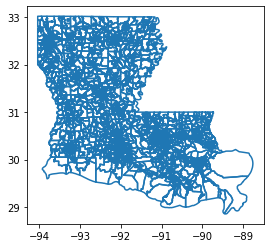

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Downloaded SOS Election Results using the same file linked by VEST. Cleaned in Excel. File available on request.

In [6]:
election_results = pd.read_csv('./raw-from-source/SOS/election_results_clean.csv')

In [7]:
election_results.head(10)

,County,Precinct,"Joseph R. Biden, Kamala Harris Democratic (DEM)","Jo Jorgensen, Jeremy Cohen Libertarian (LBT)","Donald J. Trump, Michael Pence Republican (REP)","Brian Carroll, Amar Patel American Solidarity Party (OTHER)","Jade Simmons, Claudeliah Roze Becoming One Nation (OTHER)","President Boddie,Eric Stoneham C.U.P. (OTHER)","Don Blankenship, William Mohr Constitution Party (OTHER)","Brock Pierce, Karla Ballard Freedom and Prosperity (OTHER)","Tom Hoefling, Andy Prior Life, Liberty, Constitution (OTHER)","Gloria La Riva, Sunil Freeman Socialism and Liberation (OTHER)","Alyson Kennedy,Malcolm Jarrett Socialist Workers Party (OTHER)","Kanye West, Michelle Tidball The Birthday Party (OTHER)","Bill Hammons, Eric Bodenstab Unity Party America (OTHER)",Beryl Billiot (NOPTY),John Paul Bourgeois (NOPTY),"""Bill"" Cassidy (REP)",Reno Jean Daret III (NOPTY),"Derrick ""Champ"" Edwards (DEM)","""Xan"" John (OTHER)",David Drew Knight (DEM),"M.V. ""Vinny"" Mendoza (IND)",Jamar Montgomery (NOPTY),Dustin Murphy (REP),Adrian Perkins (DEM),Antoine Pierce (DEM),Melinda Mary Price (OTHER),Aaron C. Sigler (LBT),Peter Wenstrup (DEM)
0,Acadia,01 01,49,5,713,1,0,0,0,0,2,0,0,2,0,8,14,664,2,15,3,3,2,2,19,17,2,1,0,0
1,Acadia,01 02A,76,4,140,1,0,0,1,0,0,0,0,1,2,4,5,139,4,15,2,7,2,2,2,24,2,2,1,1
2,Acadia,01 02B,28,3,209,1,1,0,0,0,0,0,0,0,0,2,4,196,1,12,3,3,0,1,6,6,1,1,1,0
3,Acadia,01 03A,36,6,278,0,0,0,0,0,0,0,0,2,0,0,2,267,1,13,3,0,1,0,5,10,6,0,2,1
4,Acadia,01 03B,70,2,204,0,0,0,0,0,0,0,0,1,1,1,2,185,0,24,3,0,2,4,8,27,6,3,0,0
5,Acadia,01 04A,24,1,217,2,0,0,1,0,0,0,0,0,0,6,3,210,0,11,1,1,0,0,2,5,0,2,1,0
6,Acadia,01 04B,58,5,234,0,1,0,0,0,0,0,0,1,1,2,3,222,0,27,1,3,1,1,7,13,4,1,3,0
7,Acadia,01 05A,43,2,151,0,0,0,0,0,0,0,0,1,0,2,4,134,3,11,0,2,0,0,8,17,1,1,2,0
8,Acadia,01 05B,106,3,86,1,0,0,1,1,0,0,0,0,0,4,4,78,2,22,0,2,0,1,1,57,4,4,0,1
9,Acadia,01 06,230,4,21,1,1,1,0,0,0,0,0,2,0,15,6,23,4,60,0,9,3,3,0,105,10,1,0,0


In [8]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Louisiana"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
la_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "22" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [9]:
#Combine Presidential Write In votes
election_results['G20PREOOTH']=election_results['Brian Carroll, Amar Patel American Solidarity Party (OTHER)']+election_results['Jade Simmons, Claudeliah Roze Becoming One Nation (OTHER)']+election_results['President Boddie,Eric Stoneham C.U.P. (OTHER)']+election_results['Don Blankenship, William Mohr Constitution Party (OTHER)']+election_results['Brock Pierce, Karla Ballard Freedom and Prosperity (OTHER)']+election_results['Tom Hoefling, Andy Prior Life, Liberty, Constitution (OTHER)']+election_results['Gloria La Riva, Sunil Freeman Socialism and Liberation (OTHER)']+election_results['Alyson Kennedy,Malcolm Jarrett Socialist Workers Party (OTHER)']+election_results['Bill Hammons, Eric Bodenstab Unity Party America (OTHER)']
election_results = election_results.drop(columns=['Brian Carroll, Amar Patel American Solidarity Party (OTHER)','Jade Simmons, Claudeliah Roze Becoming One Nation (OTHER)','President Boddie,Eric Stoneham C.U.P. (OTHER)','Don Blankenship, William Mohr Constitution Party (OTHER)','Brock Pierce, Karla Ballard Freedom and Prosperity (OTHER)','Tom Hoefling, Andy Prior Life, Liberty, Constitution (OTHER)','Gloria La Riva, Sunil Freeman Socialism and Liberation (OTHER)','Alyson Kennedy,Malcolm Jarrett Socialist Workers Party (OTHER)','Bill Hammons, Eric Bodenstab Unity Party America (OTHER)'])

In [10]:
election_results.head(1)

,County,Precinct,"Joseph R. Biden, Kamala Harris Democratic (DEM)","Jo Jorgensen, Jeremy Cohen Libertarian (LBT)","Donald J. Trump, Michael Pence Republican (REP)","Kanye West, Michelle Tidball The Birthday Party (OTHER)",Beryl Billiot (NOPTY),John Paul Bourgeois (NOPTY),"""Bill"" Cassidy (REP)",Reno Jean Daret III (NOPTY),"Derrick ""Champ"" Edwards (DEM)","""Xan"" John (OTHER)",David Drew Knight (DEM),"M.V. ""Vinny"" Mendoza (IND)",Jamar Montgomery (NOPTY),Dustin Murphy (REP),Adrian Perkins (DEM),Antoine Pierce (DEM),Melinda Mary Price (OTHER),Aaron C. Sigler (LBT),Peter Wenstrup (DEM),G20PREOOTH
0,Acadia,01 01,49,5,713,2,8,14,664,2,15,3,3,2,2,19,17,2,1,0,0,3


In [11]:
#Rename Columns
election_results.columns = ['County', 'Precinct', 'G20PREDBID', 'G20PRELJOR', 'G20PRERTRU','G20PREOWES','G20USSNBIL','G20USSNBOU','G20USSRCAS','G20USSNDAR','G20USSDEDW','G20USSOJOH','G20USSDKNI','G20USSIMEN','G20USSNMON','G20USSRMUR','G20USSDPER','G20USSDPIE','G20USSOPRI','G20USSLSIG','G20USSDWEN','G20PREOOTH']

In [12]:
#Add FIPS columns
election_results['County']=election_results['County'].str.upper()
election_results.loc[election_results['County']=='LASALLE', 'County'] = 'LA SALLE'
election_results.County = election_results.County.str.replace('.', '')
election_results["COUNTYFP"] = election_results["County"].map(la_fips_dict).fillna(election_results["County"])

<ipython-input-12-c5990fb7408f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  election_results.County = election_results.County.str.replace('.', '')


In [13]:
election_results.COUNTYFP.unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', '103', '105', '107',
       '109', '111', '113', '115', '117', '119', '121', '123', '125',
       '127'], dtype=object)

## Compare vote totals before allocation

In [14]:
races = [x for x in vest_shp.columns if 'G20' in x]
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREOWES',
 'G20PREOOTH',
 'G20USSRCAS',
 'G20USSRMUR',
 'G20USSDPER',
 'G20USSDEDW',
 'G20USSDPIE',
 'G20USSDKNI',
 'G20USSDWEN',
 'G20USSLSIG',
 'G20USSIMEN',
 'G20USSOPRI',
 'G20USSOJOH',
 'G20USSNBIL',
 'G20USSNBOU',
 'G20USSNMON',
 'G20USSNDAR']

In [15]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

4219605
4219605


## Allocate Votes

In [16]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [17]:
searchfor = ['Absentee']
in_sos =  election_results[election_results["Precinct"].str.contains('|'.join(searchfor))]
in_sos = in_sos.groupby(by=["COUNTYFP"]).sum().reset_index()
in_sos

,COUNTYFP,G20PREDBID,G20PRELJOR,G20PRERTRU,G20PREOWES,G20USSNBIL,G20USSNBOU,G20USSRCAS,G20USSNDAR,G20USSDEDW,G20USSOJOH,G20USSDKNI,G20USSIMEN,G20USSNMON,G20USSRMUR,G20USSDPER,G20USSDPIE,G20USSOPRI,G20USSLSIG,G20USSDWEN,G20PREOOTH
0,001,2166,65,7254,9,49,50,7155,7,603,26,104,10,10,196,874,139,23,28,45,30
1,003,814,17,2239,3,12,19,2150,2,343,5,70,10,7,98,198,65,4,6,16,11
2,005,12348,308,21340,49,155,193,21522,36,3414,21,513,93,37,704,5491,878,75,196,227,136
3,007,1618,10,1916,4,33,10,1949,6,478,0,65,2,5,49,752,82,7,5,25,14
4,009,1827,34,3481,8,44,26,3384,6,683,6,110,13,5,134,591,114,19,13,35,22
5,011,1634,51,5190,4,31,32,4934,9,621,10,147,25,9,256,409,171,14,45,52,26
6,013,1633,18,1202,4,17,12,1199,1,239,1,35,1,1,29,1174,59,8,5,24,12
7,015,8712,228,19097,18,59,91,18921,22,1259,11,314,74,39,543,5671,355,49,129,152,85
8,017,18763,162,10854,37,60,106,11495,13,3090,16,512,74,103,252,12394,1113,63,77,255,94
9,019,17287,474,29021,57,184,331,28675,53,7214,44,1253,166,166,1234,4240,1505,191,351,538,187


In [18]:
election_results = election_results[~election_results["Precinct"].str.contains('|'.join(searchfor))]
election_results = allocate_absentee(election_results,in_sos,races,'COUNTYFP')
print('Done')

Done


## Compare Election Result Totals

### Compare Vote Totals

In [19]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

4219605
4219605.0


### Compare Race Totals

In [20]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [21]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G20PRERTRU is equal 	VEST / RDH: 1255776
G20PREDBID is equal 	VEST / RDH: 856034
G20PRELJOR is equal 	VEST / RDH: 21645
G20PREOWES is equal 	VEST / RDH: 4897
G20PREOOTH is equal 	VEST / RDH: 9710
G20USSRCAS is equal 	VEST / RDH: 1228908
G20USSRMUR is equal 	VEST / RDH: 38383
G20USSDPER is equal 	VEST / RDH: 394049
G20USSDEDW is equal 	VEST / RDH: 229814
G20USSDPIE is equal 	VEST / RDH: 55710
G20USSDKNI is equal 	VEST / RDH: 36962
G20USSDWEN is equal 	VEST / RDH: 14454
G20USSLSIG is equal 	VEST / RDH: 11321
G20USSIMEN is equal 	VEST / RDH: 7811
G20USSOPRI is equal 	VEST / RDH: 7680
G20USSOJOH is equal 	VEST / RDH: 2813
G20USSNBIL is equal 	VEST / RDH: 17362
G20USSNBOU is equal 	VEST / RDH: 16518
G20USSNMON is equal 	VEST / RDH: 5804
G20USSNDAR is equal 	VEST / RDH: 3954


### Compare County Totals

In [22]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    print(diff_counties)

In [23]:
county_totals_check(vest_shp,election_results,races,'COUNTYFP')

***Countywide Totals Check***

G20PRERTRU is equal across all counties
G20PREDBID is equal across all counties
G20PRELJOR is equal across all counties
G20PREOWES is equal across all counties
G20PREOOTH is equal across all counties
G20USSRCAS is equal across all counties
G20USSRMUR is equal across all counties
G20USSDPER is equal across all counties
G20USSDEDW is equal across all counties
G20USSDPIE is equal across all counties
G20USSDKNI is equal across all counties
G20USSDWEN is equal across all counties
G20USSLSIG is equal across all counties
G20USSIMEN is equal across all counties
G20USSOPRI is equal across all counties
G20USSOJOH is equal across all counties
G20USSNBIL is equal across all counties
G20USSNBOU is equal across all counties
G20USSNMON is equal across all counties
G20USSNDAR is equal across all counties
[]


## Attempt to Join

In [24]:
#Add join columns to both
election_results["join_col"]=election_results['COUNTYFP']+election_results['Precinct']
vest_shp["join_col"]=vest_shp['COUNTYFP']+vest_shp['VTDST']

In [25]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

3934
3934
3753
3753


In [26]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [27]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["VTDST"])
print(len(empty_precincts))

31


In [28]:
data_columns = races
empty_precincts = []
for index, row in election_results.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["Precinct"])
print(len(empty_precincts))

25


## Attempt Join

In [29]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

left_only     3934
right_only    3753
both             0
Name: _merge, dtype: int64


In [30]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP_x','Precinct','COUNTYFP_y','VTDST','join_col']].head(10)

,COUNTYFP_x,Precinct,COUNTYFP_y,VTDST,join_col
0,001,01 01,NaN,NaN,00101 01
1,001,01 02A,NaN,NaN,00101 02A
2,001,01 02B,NaN,NaN,00101 02B
3,001,01 03A,NaN,NaN,00101 03A
4,001,01 03B,NaN,NaN,00101 03B
5,001,01 04A,NaN,NaN,00101 04A
6,001,01 04B,NaN,NaN,00101 04B
7,001,01 05A,NaN,NaN,00101 05A
8,001,01 05B,NaN,NaN,00101 05B
9,001,01 06,NaN,NaN,00101 06


In [31]:
la_names_dict = {'00101 01': '0010001-1', '00101 02A': '001001-2A', '00101 02B': '001001-2B', '00101 03A': '001001-3A', '00101 03B': '001001-3B', '00101 04A': '001001-4A', '00101 04B': '001001-4B', '00101 05A': '001001-5A', '00101 05B': '001001-5B', '00101 06': '0010001-6', '00101 07': '0010001-7', '00101 08': '0010001-8', '00101 09': '0010001-9', '00102 01': '0010002-1', '00102 02': '0010002-2', '00102 03': '0010002-3', '00102 04': '0010002-4', '00102 05': '0010002-5', '00103 01': '0010003-1', '00103 02': '0010003-2', '00103 03A': '001003-3A', '00103 03B': '001003-3B', '00103 04': '0010003-4', '00103 05': '0010003-5', '00103 06': '0010003-6', '00103 07': '0010003-7', '00104 01': '0010004-1', '00104 02': '0010004-2', '00104 04': '0010004-4', '00104 05': '0010004-5', '00104 06': '0010004-6', '00105 01A': '001005-1A', '00105 02A': '001005-2A', '00105 03': '0010005-3', '00105 04': '0010005-4', '00105 05': '0010005-5', '00106 01': '0010006-1', '00106 02': '0010006-2', '00106 03A': '001006-3A', '00106 03B': '001006-3B', '00106 04': '0010006-4', '00106 06': '0010006-6', '00106 07': '0010006-7', '00106 08': '0010006-8', '00106 09': '0010006-9', '00106 10': '001006-10', '00106 11': '001006-11', '00106 12': '001006-12', '00106 13': '001006-13', '00106 14': '001006-14', '00106 15': '001006-15', '00106 16': '001006-16', '00107 02': '0010007-2', '00107 03': '0010007-3', '00107 04': '0010007-4', '00301 01': '0030001-1', '00301 02': '0030001-2', '00301 03': '0030001-3', '00301 04': '0030001-4', '00301 05': '0030001-5', '00301 06': '0030001-6', '00302 01': '0030002-1', '00302 02': '0030002-2', '00302 02A': '00302-2-A', '00302 03': '0030002-3', '00302 04-C': '00302-4-C', '00302 04-O': '00302-4-O', '00302 05': '0030002-5', '00302 06': '0030002-6', '00303 01': '0030003-1', '00303 02': '0030003-2', '00304 02': '0030004-2', '00304 03': '0030004-3', '00305 02': '0030005-2', '00305 03': '0030005-3', '00305 04-C': '00305-4-C', '00305 04-O': '00305-4-O', '00305 05': '0030005-5', '00305 07': '0030005-7', '00305 08A': '003005-8A', '00305 09': '0030005-9', '00305 10': '003005-10', '00305 12': '003005-12', '00305 13': '003005-13', '00500 01 A': '005000001', '00500 01 B': '005000001', '00500 02 A': '005000002', '00500 02 B': '005000002', '00500 03': '005000003', '00500 04': '005000004', '00500 05': '005000005', '00500 06 A': '005000006', '00500 06 B': '005000006', '00500 06 C': '005000006', '00500 07 A': '005000007', '00500 07 B': '005000007', '00500 08 A': '005000008', '00500 08 B': '005000008', '00500 09': '005000009', '00500 10': '005000010', '00500 11 A': '005000011', '00500 11 B': '005000011', '00500 12': '005000012', '00500 13': '005000013', '00500 14': '005000014', '00500 15': '005000015', '00500 16': '005000016', '00500 17': '005000017', '00500 18': '005000018', '00500 20': '005000020', '00500 21': '005000021', '00500 22': '005000022', '00500 23': '005000023', '00500 24': '005000024', '00500 25': '005000025', '00500 26 A': '005000026', '00500 26 B': '005000026', '00500 27': '005000027', '00500 28': '005000028', '00500 30': '005000030', '00500 31': '005000031', '00500 32': '005000032', '00500 33': '005000033', '00500 34': '005000034', '00500 35': '005000035', '00500 36': '005000036', '00500 37 A': '005000037', '00500 37 B': '005000037', '00500 39': '005000039', '00500 40 A': '005000040', '00500 40 B': '005000040', '00500 41': '005000041', '00500 42': '005000042', '00500 43': '005000043', '00500 44': '005000044', '00500 45': '005000045', '00500 47': '005000047', '00500 48': '005000048', '00500 50': '005000050', '00500 51': '005000051', '00500 52': '005000052', '00500 53': '005000053', '00500 54': '005000054', '00500 55': '005000055', '00500 56': '005000056', '00500 57': '005000057', '00500 58': '005000058', '00500 60': '005000060', '00500 70': '005000070', '00500 71 A': '005000071', '00500 71 B': '005000071', '00500 72': '005000072', '00500 73': '005000073', '00500 74': '005000074', '00500 75': '005000075', '00500 76': '005000076', '00500 77': '005000077', '00500 78': '005000078', '00701 01': '0070001-1', '00701 02': '0070001-2', '00702 01': '0070002-1', '00702 02': '0070002-2', '00702 03': '0070002-3', '00702 04': '0070002-4', '00702 05': '0070002-5', '00703 01': '0070003-1', '00703 02': '0070003-2', '00704 01': '0070004-1', '00704 02': '0070004-2', '00704 03': '0070004-3', '00705 01': '0070005-1', '00705 02': '0070005-2', '00705 03': '0070005-3', '00705 05': '0070005-5', '00706 01': '0070006-1', '00706 01 A': '0070006-1', '00706 02': '0070006-2', '00706 03': '0070006-3', '00707 01': '0070007-1', '00707 01 A': '0070007-1', '00707 02': '0070007-2', '00707 03': '0070007-3', '00708 01': '0070008-1', '00708 01 A': '0070008-1', '00709 01': '0070009-1', '00709 01 A': '0070009-1', '00901 01': '0090001-1', '00901 02': '0090001-2', '00901 03': '0090001-3', '00902 01': '0090002-1', '00902 02': '0090002-2', '00902 02A': '009002-2A', '00902 02B': '009002-2B', '00902 02C': '009002-2C', '00902 02D': '009002-2D', '00902 02F': '009002-2F', '00902 03A': '009002-3A', '00902 04': '0090002-4', '00902 04A': '009002-4A', '00902 05': '0090002-5', '00902 05E': '009002-5E', '00902 07': '0090002-7', '00902 08': '0090002-8', '00903 01': '0090003-1', '00903 01B': '009003-1B', '00903 03': '0090003-3', '00904 01': '0090004-1', '00904 02': '0090004-2', '00904 02A': '009004-2A', '00905 01': '0090005-1', '00905 01A': '009005-1A', '00906 01A': '009006-1A', '00906 02': '0090006-2', '00906 02A': '009006-2A', '00907 01': '0090007-1', '00907 03': '0090007-3', '00907 03B': '009007-3B', '00908 01': '0090008-1', '00908 02A': '009008-2A', '00908 02B': '009008-2B', '00908 03': '0090008-3', '00908 03A': '009008-3A', '00909 01A': '009009-1A', '00909 02': '0090009-2', '00909 02A': '009009-2A', '00909 03': '0090009-3', '00909 04': '0090009-4', '00909 04B': '009009-4B', '00909 05B': '009009-5B', '00910 02': '0090010-2', '00910 02A': '009010-2A', '00910 03A': '009010-3A', '00910 04': '0090010-4', '00911 01': '0090011-1', '00911 02A': '009011-2A', '01100 01': '011000001', '01100 02': '011000002', '01100 03': '011000003', '01100 04': '011000004', '01100 05': '011000005', '01100 06': '011000006', '01100 07': '011000007', '01100 09': '011000009', '01100 10': '011000010', '01100 11': '011000011', '01100 12': '011000012', '01100 12A': '01100012A', '01100 12B': '01100012B', '01100 13': '011000013', '01100 13A': '01100013A', '01100 14': '011000014', '01100 14A': '01100014A', '01100 15': '011000015', '01100 16': '011000016', '01100 16A': '01100016A', '01100 16B': '01100016B', '01100 17': '011000017', '01100 17A': '01100017A', '01100 18': '011000018', '01100 18A': '01100018A', '01100 19': '011000019', '01100 19C': '01100019C', '01100 20': '011000020', '01100 21': '011000021', '01100 22': '011000022', '01100 25': '011000025', '01100 25A': '01100025A', '01100 25B': '01100025B', '01100 26': '011000026', '01100 27': '011000027', '01100 27A': '01100027A', '01100 27B': '01100027B', '01100 27D': '01100027D', '01100 28': '011000028', '01100 30': '011000030', '01301 01': '0130001-1', '01301 02': '0130001-2', '01301 03': '0130001-3', '01301 04': '0130001-4', '01302 01': '0130002-1', '01302 02': '0130002-2', '01302 03': '0130002-3', '01302 04': '0130002-4', '01302 05': '0130002-5', '01302 06': '0130002-6', '01303 01': '0130003-1', '01303 02': '0130003-2', '01303 03': '0130003-3', '01303 04': '0130003-4', '01303 05': '0130003-5', '01303 06': '0130003-6', '01303 07': '0130003-7', '01304 01': '0130004-1', '01304 02': '0130004-2', '01304 04': '0130004-4', '01305 01': '0130005-1', '01305 02': '0130005-2', '01305 03': '0130005-3', '01305 04': '0130005-4', '01306 01': '0130006-1', '01306 02': '0130006-2', '01306 03': '0130006-3', '01306 04': '0130006-4', '01307 01': '0130007-1', '01307 02': '0130007-2', '01307 03': '0130007-3', '01307 04': '0130007-4', '01307 05': '0130007-5', '01501 01': '0150001-1', '01501 02': '0150001-2', '01501 03': '0150001-3', '01501 03A': '015001-3A', '01501 03B': '015001-3B', '01501 04': '0150001-4', '01501 05': '0150001-5', '01502 01': '0150002-1', '01502 02': '0150002-2', '01502 03': '0150002-3', '01502 03A': '015002-3A', '01502 04 -1': '0150002-4', '01502 04 -2': '0150002-4', '01502 05A': '015002-5A', '01502 06': '0150002-6', '01502 07': '0150002-7', '01502 08': '0150002-8', '01502 09': '0150002-9', '01502 10': '015002-10', '01502 11': '015002-11', '01502 11A': '01502-11A', '01502 12A': '01502-12A', '01502 12B': '01502-12B', '01502 12C': '01502-12C', '01502 13': '015002-13', '01502 14': '015002-14', '01502 15': '015002-15', '01502 16': '015002-16', '01502 16A': '01502-16A', '01502 17A': '01502-17A', '01502 17B': '01502-17B', '01502 18B': '01502-18B', '01502 18C': '01502-18C', '01502 18D': '01502-18D', '01502 18E -1': '01502-18E', '01502 18E -2': '01502-18E', '01502 18F': '01502-18F', '01502 19': '015002-19', '01502 20': '015002-20', '01502 21A': '01502-21A', '01502 21B': '01502-21B', '01502 21C -1': '01502-21C', '01502 21C -2': '01502-21C', '01502 21D -1': '01502-21D', '01502 21D -2': '01502-21D', '01502 22A -1': '01502-22A', '01502 22A -2': '01502-22A', '01502 22B': '01502-22B', '01502 22C': '01502-22C', '01502 23': '015002-23', '01503 01': '0150003-1', '01503 02': '0150003-2', '01503 03': '0150003-3', '01503 04': '0150003-4', '01504 01A': '015004-1A', '01504 02': '0150004-2', '01504 03A': '015004-3A', '01504 03B': '015004-3B', '01504 03C': '015004-3C', '01504 03D': '015004-3D', '01504 04A -1': '015004-4A', '01504 04A -2': '015004-4A', '01504 04B -1': '015004-4B', '01504 04B -2': '015004-4B', '01504 05A': '015004-5A', '01504 06 -1': '0150004-6', '01504 06 -2': '0150004-6', '01504 07 -1': '0150004-7', '01504 07 -2': '0150004-7', '01504 08A': '015004-8A', '01504 08B -1': '015004-8B', '01504 08B -2': '015004-8B', '01504 08C': '015004-8C', '01504 08D': '015004-8D', '01504 08E': '015004-8E', '01504 08F': '015004-8F', '01504 09': '0150004-9', '01504 10 -1': '015004-10', '01504 10 -2': '015004-10', '01504 11A': '01504-11A', '01504 11B': '01504-11B', '01504 11C': '01504-11C', '01700 001': '017000001', '01700 002': '017000002', '01700 003': '017000003', '01700 004': '017000004', '01700 005 A': '017000005', '01700 005 B': '017000005', '01700 006': '017000006', '01700 007': '017000007', '01700 008': '017000008', '01700 009': '017000009', '01700 010': '017000010', '01700 011': '017000011', '01700 012': '017000012', '01700 013': '017000013', '01700 014': '017000014', '01700 015': '017000015', '01700 016': '017000016', '01700 017': '017000017', '01700 020': '017000020', '01700 021': '017000021', '01700 022': '017000022', '01700 023': '017000023', '01700 024': '017000024', '01700 025': '017000025', '01700 026': '017000026', '01700 027': '017000027', '01700 028': '017000028', '01700 029': '017000029', '01700 030': '017000030', '01700 031': '017000031', '01700 032': '017000032', '01700 034': '017000034', '01700 035': '017000035', '01700 036': '017000036', '01700 037': '017000037', '01700 038': '017000038', '01700 039': '017000039', '01700 040': '017000040', '01700 041': '017000041', '01700 043': '017000043', '01700 044': '017000044', '01700 045': '017000045', '01700 046': '017000046', '01700 047': '017000047', '01700 048': '017000048', '01700 049 A': '017000049', '01700 049 B': '017000049', '01700 050': '017000050', '01700 051': '017000051', '01700 052': '017000052', '01700 053': '017000053', '01700 054': '017000054', '01700 055': '017000055', '01700 056': '017000056', '01700 057': '017000057', '01700 058': '017000058', '01700 059': '017000059', '01700 060': '017000060', '01700 061': '017000061', '01700 062': '017000062', '01700 063': '017000063', '01700 064': '017000064', '01700 065': '017000065', '01700 066': '017000066', '01700 067': '017000067', '01700 068': '017000068', '01700 069': '017000069', '01700 070': '017000070', '01700 071': '017000071', '01700 072': '017000072', '01700 073': '017000073', '01700 074': '017000074', '01700 075': '017000075', '01700 076': '017000076', '01700 077': '017000077', '01700 078': '017000078', '01700 079': '017000079', '01700 080': '017000080', '01700 081': '017000081', '01700 082': '017000082', '01700 083': '017000083', '01700 084': '017000084', '01700 085': '017000085', '01700 086': '017000086', '01700 087': '017000087', '01700 088': '017000088', '01700 089': '017000089', '01700 090 A': '017000090', '01700 090 B': '017000090', '01700 091 A': '017000091', '01700 091 B': '017000091', '01700 092': '017000092', '01700 093': '017000093', '01700 094': '017000094', '01700 095': '017000095', '01700 097': '017000097', '01700 098': '017000098', '01700 099': '017000099', '01700 100': '017000100', '01700 101': '017000101', '01700 102': '017000102', '01700 103': '017000103', '01700 104': '017000104', '01700 105': '017000105', '01700 106': '017000106', '01700 107': '017000107', '01700 108': '017000108', '01700 109': '017000109', '01700 110': '017000110', '01700 111': '017000111', '01700 112': '017000112', '01700 113': '017000113', '01700 114': '017000114', '01700 115': '017000115', '01700 122 A': '017000122', '01700 122 B': '017000122', '01700 123': '017000123', '01700 125': '017000125', '01700 126': '017000126', '01700 127': '017000127', '01700 128': '017000128', '01700 129': '017000129', '01700 132': '017000132', '01700 133': '017000133', '01700 134': '017000134', '01700 135': '017000135', '01700 136 A': '017000136', '01700 136 B': '017000136', '01700 137': '017000137', '01700 138': '017000138', '01700 139': '017000139', '01700 140': '017000140', '01700 142': '017000142', '01700 143': '017000143', '01700 144': '017000144', '01700 145': '017000145', '01700 146': '017000146', '01700 149': '017000149', '01700 151': '017000151', '01700 154': '017000154', '01700 155': '017000155', '01700 156': '017000156', '01700 157': '017000157', '01700 158': '017000158', '01700 159': '017000159', '01700 160': '017000160', '01700 161': '017000161', '01700 162': '017000162', '01700 163': '017000163', '01700 165': '017000165', '01700 166': '017000166', '01900 160E': '01900160E', '01900 160W': '01900160W', '01900 161': '019000161', '01900 162E': '01900162E', '01900 162W': '01900162W', '01900 163': '019000163', '01900 164': '019000164', '01900 165': '019000165', '01900 166E': '01900166E', '01900 166W': '01900166W', '01900 167': '019000167', '01900 260': '019000260', '01900 261': '019000261', '01900 262': '019000262', '01900 300': '019000300', '01900 301': '019000301', '01900 302': '019000302', '01900 303': '019000303', '01900 304': '019000304', '01900 305': '019000305', '01900 306': '019000306', '01900 307': '019000307', '01900 308': '019000308', '01900 309E': '01900309E', '01900 309W': '01900309W', '01900 310': '019000310', '01900 311': '019000311', '01900 312': '019000312', '01900 313E': '01900313E', '01900 313W': '01900313W', '01900 314': '019000314', '01900 315E': '01900315E', '01900 315W': '01900315W', '01900 316E': '01900316E', '01900 316W': '01900316W', '01900 317': '019000317', '01900 318': '019000318', '01900 319N': '01900319N', '01900 319S': '01900319S', '01900 320E': '01900320E', '01900 320W': '01900320W', '01900 321': '019000321', '01900 322': '019000322', '01900 323': '019000323', '01900 324': '019000324', '01900 325': '019000325', '01900 326': '019000326', '01900 327': '019000327', '01900 328': '019000328', '01900 329': '019000329', '01900 330': '019000330', '01900 331': '019000331', '01900 332N': '01900332N', '01900 332S': '01900332S', '01900 333': '019000333', '01900 334': '019000334', '01900 335': '019000335', '01900 336': '019000336', '01900 337': '019000337', '01900 338': '019000338', '01900 339': '019000339', '01900 340': '019000340', '01900 360': '019000360', '01900 361': '019000361', '01900 362': '019000362', '01900 363': '019000363', '01900 364': '019000364', '01900 365': '019000365', '01900 366': '019000366', '01900 367': '019000367', '01900 368': '019000368', '01900 369': '019000369', '01900 370': '019000370', '01900 371N': '01900371N', '01900 371S': '01900371S', '01900 372': '019000372', '01900 400': '019000400', '01900 401': '019000401', '01900 402': '019000402', '01900 403': '019000403', '01900 404': '019000404', '01900 405': '019000405', '01900 406': '019000406', '01900 407': '019000407', '01900 408': '019000408', '01900 440': '019000440', '01900 441': '019000441', '01900 460E': '01900460E', '01900 460W': '01900460W', '01900 461': '019000461', '01900 463': '019000463', '01900 464': '019000464', '01900 465': '019000465', '01900 466E': '01900466E', '01900 466W': '01900466W', '01900 467': '019000467', '01900 468': '019000468', '01900 469': '019000469', '01900 560': '019000560', '01900 561': '019000561', '01900 562': '019000562', '01900 600': '019000600', '01900 601': '019000601', '01900 602': '019000602', '01900 603': '019000603', '01900 660': '019000660', '01900 661': '019000661', '01900 662': '019000662', '01900 663': '019000663', '01900 664': '019000664', '01900 700': '019000700', '01900 701': '019000701', '01900 702': '019000702', '01900 703': '019000703', '01900 760': '019000760', '01900 761': '019000761', '01900 762': '019000762', '01900 800': '019000800', '01900 801': '019000801', '01900 860N': '01900860N', '01900 860S': '01900860S', '01900 861E': '01900861E', '01900 861W': '01900861W', '02101 01': '0210001-1', '02101 02': '0210001-2', '02102 01': '0210002-1', '02102 02': '0210002-2', '02103 01': '0210003-1', '02103 02': '0210003-2', '02103 03': '0210003-3', '02104 01': '0210004-1', '02104 01A': '021004-1A', '02104 02': '0210004-2', '02105 01': '0210005-1', '02105 02': '0210005-2', '02105 03': '0210005-3', '02106 01': '0210006-1', '02106 02': '0210006-2', '02106 03': '0210006-3', '02107 01': '0210007-1', '02107 02': '0210007-2', '02107 03': '0210007-3', '02300 01': '023000001', '02300 02': '023000002', '02300 04': '023000004', '02300 05N': '02300005N', '02300 05S': '02300005S', '02300 08': '023000008', '02300 09': '023000009', '02300 12': '023000012', '02300 13': '023000013', '02300 15': '023000015', '02300 16A': '02300016A', '02300 16B': '02300016B', '02300 16C': '02300016C', '02300 17': '023000017', '02501 1': '0250001-1', '02501 2': '0250001-2', '02501 3': '0250001-3', '02501 4': '0250001-4', '02502 1': '0250002-1', '02502 2': '0250002-2', '02503 1': '0250003-1', '02503 2': '0250003-2', '02503 3': '0250003-3', '02503 4': '0250003-4', '02504 1': '0250004-1', '02504 2': '0250004-2', '02505 1': '0250005-1', '02506 1': '0250006-1', '02506 2': '0250006-2', '02506 3': '0250006-3', '02506 5': '0250006-5', '02507 1': '0250007-1', '02507 3': '0250007-3', '02507 5': '0250007-5', '02508 1': '0250008-1', '02509 1': '0250009-1', '02509 2': '0250009-2', '02509 3': '0250009-3', '02509 4': '0250009-4', '02700 01': '027000001', '02700 03': '027000003', '02700 05': '027000005', '02700 07': '027000007', '02700 08': '027000008', '02700 10': '027000010', '02700 11': '027000011', '02700 21': '027000021', '02700 31': '027000031', '02700 34': '027000034', '02700 35': '027000035', '02700 36': '027000036', '02700 37': '027000037', '02700 41': '027000041', '02700 42': '027000042', '02700 51': '027000051', '02700 81': '027000081', '02700 84': '027000084', '02700 85': '027000085', '02700 87': '027000087', '02700 88': '027000088', '02700 91': '027000091', '02700 92': '027000092', '02700 93': '027000093', '02700 96': '027000096', '02900 1-1': '0290001-1', '02900 1-2': '0290001-2', '02900 1-3': '0290001-3', '02900 1-4': '0290001-4', '02900 2-1': '0290002-1', '02900 3-1': '0290003-1', '02900 3-2': '0290003-2', '02900 3-3': '0290003-3', '02900 3-4': '0290003-4', '02900 4-1': '0290004-1', '02900 4-2': '0290004-2', '02900 4-3': '0290004-3', '02900 4-4': '0290004-4', '02900 5-1': '0290005-1', '02900 5-2': '0290005-2', '02900 5-2B': '029005-2B', '02900 5-3': '0290005-3', '02900 5-4': '0290005-4', '02900 5-5': '0290005-5', '02900 5-6': '0290005-6', '03100 01': '031000001', '03100 04': '031000004', '03100 05': '031000005', '03100 06': '031000006', '03100 09': '031000009', '03100 10': '031000010', '03100 11': '031000011', '03100 15': '031000015', '03100 16': '031000016', '03100 21': '031000021', '03100 22': '031000022', '03100 23': '031000023', '03100 26': '031000026', '03100 28': '031000028', '03100 29': '031000029', '03100 30': '031000030', '03100 31': '031000031', '03100 32': '031000032', '03100 33': '031000033', '03100 34': '031000034', '03100 35': '031000035', '03100 37': '031000037', '03100 38': '031000038', '03100 39': '031000039', '03100 42': '031000042', '03100 44': '031000044', '03100 46': '031000046', '03100 48': '031000048', '03100 49': '031000049', '03100 51': '031000051', '03100 53': '031000053', '03100 55': '031000055', '03100 56': '031000056', '03100 59': '031000059', '03100 60': '031000060', '03100 61': '031000061', '03100 63': '031000063', '03301 001': '0330001-1', '03301 002 A': '0330001-2', '03301 002 B': '0330001-2', '03301 003': '0330001-3', '03301 004': '0330001-4', '03301 005 A': '0330001-5', '03301 005 B': '0330001-5', '03301 006': '0330001-6', '03301 007': '0330001-7', '03301 008': '0330001-8', '03301 009': '0330001-9', '03301 010 A': '033001-10', '03301 010 B': '033001-10', '03301 011': '033001-11', '03301 012 A': '033001-12', '03301 012 B': '033001-12', '03301 013': '033001-13', '03301 014 A': '033001-14', '03301 014 B': '033001-14', '03301 015 A': '033001-15', '03301 015 B': '033001-15', '03301 016': '033001-16', '03301 017': '033001-17', '03301 018': '033001-18', '03301 019': '033001-19', '03301 020 A': '033001-20', '03301 020 B': '033001-20', '03301 021': '033001-21', '03301 022': '033001-22', '03301 023': '033001-23', '03301 024': '033001-24', '03301 025': '033001-25', '03301 026': '033001-26', '03301 027': '033001-27', '03301 028': '033001-28', '03301 029': '033001-29', '03301 030': '033001-30', '03301 031 A': '033001-31', '03301 031 B': '033001-31', '03301 032 A': '033001-32', '03301 032 B': '033001-32', '03301 033': '033001-33', '03301 034 A': '033001-34', '03301 034 B': '033001-34', '03301 035': '033001-35', '03301 036': '033001-36', '03301 037 A': '033001-37', '03301 037 B': '033001-37', '03301 038 A': '033001-38', '03301 038 B': '033001-38', '03301 039': '033001-39', '03301 040': '033001-40', '03301 041 A': '033001-41', '03301 041 B': '033001-41', '03301 042 A': '033001-42', '03301 042 B': '033001-42', '03301 043': '033001-43', '03301 044': '033001-44', '03301 045': '033001-45', '03301 046 A': '033001-46', '03301 046 B': '033001-46', '03301 047 A': '033001-47', '03301 047 B': '033001-47', '03301 048 A': '033001-48', '03301 048 B': '033001-48', '03301 049 A': '033001-49', '03301 049 B': '033001-49', '03301 050': '033001-50', '03301 051': '033001-51', '03301 052 A': '033001-52', '03301 052 B': '033001-52', '03301 053 A': '033001-53', '03301 053 B': '033001-53', '03301 054 A': '033001-54', '03301 054 B': '033001-54', '03301 055 A': '033001-55', '03301 055 B': '033001-55', '03301 056 A': '033001-56', '03301 056 B': '033001-56', '03301 057': '033001-57', '03301 058 A': '033001-58', '03301 058 B': '033001-58', '03301 059': '033001-59', '03301 060 A': '033001-60', '03301 060 B': '033001-60', '03301 061': '033001-61', '03301 062': '033001-62', '03301 063 A': '033001-63', '03301 063 B': '033001-63', '03301 064': '033001-64', '03301 065': '033001-65', '03301 066 A': '033001-66', '03301 066 B': '033001-66', '03301 067': '033001-67', '03301 068': '033001-68', '03301 069 A': '033001-69', '03301 069 B': '033001-69', '03301 070 A': '033001-70', '03301 070 B': '033001-70', '03301 071 A': '033001-71', '03301 071 B': '033001-71', '03301 072 A': '033001-72', '03301 072 B': '033001-72', '03301 073 A': '033001-73', '03301 073 B': '033001-73', '03301 074 A': '033001-74', '03301 074 B': '033001-74', '03301 075 A': '033001-75', '03301 075 B': '033001-75', '03301 076': '033001-76', '03301 077 A': '033001-77', '03301 077 B': '033001-77', '03301 078 A': '033001-78', '03301 078 B': '033001-78', '03301 079': '033001-79', '03301 080 A': '033001-80', '03301 080 B': '033001-80', '03301 081 A': '033001-81', '03301 081 B': '033001-81', '03301 082 A': '033001-82', '03301 082 B': '033001-82', '03301 083 A': '033001-83', '03301 083 B': '033001-83', '03301 084': '033001-84', '03301 085 A': '033001-85', '03301 085 B': '033001-85', '03301 086 A': '033001-86', '03301 086 B': '033001-86', '03301 087 A': '033001-87', '03301 087 B': '033001-87', '03301 088': '033001-88', '03301 089': '033001-89', '03301 090 A': '033001-90', '03301 090 B': '033001-90', '03301 091 A': '033001-91', '03301 091 B': '033001-91', '03301 092 A': '033001-92', '03301 092 B': '033001-92', '03301 093': '033001-93', '03301 094': '033001-94', '03301 095 A': '033001-95', '03301 095 B': '033001-95', '03301 097': '033001-97', '03301 098 A': '033001-98', '03301 098 B': '033001-98', '03301 099 A': '033001-99', '03301 099 B': '033001-99', '03301 100 A': '03301-100', '03301 100 B': '03301-100', '03301 101 A': '03301-101', '03301 101 B': '03301-101', '03301 102': '03301-102', '03301 103 A': '03301-103', '03301 103 B': '03301-103', '03301 104 A': '03301-104', '03301 104 B': '03301-104', '03301 105': '03301-105', '03301 107': '03301-107', '03302 001 A': '0330002-1', '03302 001 B': '0330002-1', '03302 002 A': '0330002-2', '03302 002 B': '0330002-2', '03302 003': '0330002-3', '03302 004': '0330002-4', '03302 005': '0330002-5', '03302 006 A': '0330002-6', '03302 006 B': '0330002-6', '03302 007 A': '0330002-7', '03302 007 B': '0330002-7', '03302 008': '0330002-8', '03302 009 A': '0330002-9', '03302 009 B': '0330002-9', '03302 010 A': '033002-10', '03302 010 B': '033002-10', '03302 011': '033002-11', '03302 012 A': '033002-12', '03302 012 B': '033002-12', '03302 013 A': '033002-13', '03302 013 B': '033002-13', '03302 014 A': '033002-14', '03302 014 B': '033002-14', '03302 015': '033002-15', '03302 016 A': '033002-16', '03302 016 B': '033002-16', '03302 017 A': '033002-17', '03302 017 B': '033002-17', '03302 018 A': '033002-18', '03302 018 B': '033002-18', '03302 019': '033002-19', '03302 020': '033002-20', '03302 021': '033002-21', '03302 022 A': '033002-22', '03302 022 B': '033002-22', '03302 023 A': '033002-23', '03302 023 B': '033002-23', '03302 024': '033002-24', '03302 025 A': '033002-25', '03302 025 B': '033002-25', '03302 026': '033002-26', '03302 027 A': '033002-27', '03302 027 B': '033002-27', '03302 028': '033002-28', '03302 029': '033002-29', '03302 030 A': '033002-30', '03302 030 B': '033002-30', '03302 031': '033002-31', '03302 032': '033002-32', '03302 033': '033002-33', '03302 034 A': '033002-34', '03302 034 B': '033002-34', '03302 035': '033002-35', '03302 036 A': '033002-36', '03302 036 B': '033002-36', '03302 037': '033002-37', '03303 001 A': '0330003-1', '03303 001 B': '0330003-1', '03303 002 A': '0330003-2', '03303 002 B': '0330003-2', '03303 003 A': '0330003-3', '03303 003 B': '0330003-3', '03303 004 A': '0330003-4', '03303 004 B': '0330003-4', '03303 005': '0330003-5', '03303 006 A': '0330003-6', '03303 006 B': '0330003-6', '03303 007 A': '0330003-7', '03303 007 B': '0330003-7', '03303 008 A': '0330003-8', '03303 008 B': '0330003-8', '03303 009 A': '0330003-9', '03303 009 B': '0330003-9', '03303 010': '033003-10', '03303 011': '033003-11', '03303 012 A': '033003-12', '03303 012 B': '033003-12', '03303 013': '033003-13', '03303 014 A': '033003-14', '03303 014 B': '033003-14', '03303 015 A': '033003-15', '03303 015 B': '033003-15', '03303 016': '033003-16', '03303 017 A': '033003-17', '03303 017 B': '033003-17', '03303 018 A': '033003-18', '03303 018 B': '033003-18', '03303 019 A': '033003-19', '03303 019 B': '033003-19', '03303 020 A': '033003-20', '03303 020 B': '033003-20', '03303 021 A': '033003-21', '03303 021 B': '033003-21', '03303 022': '033003-22', '03303 023 A': '033003-23', '03303 023 B': '033003-23', '03303 024 A': '033003-24', '03303 024 B': '033003-24', '03303 025 A': '033003-25', '03303 025 B': '033003-25', '03303 026 A': '033003-26', '03303 026 B': '033003-26', '03303 027 A': '033003-27', '03303 027 B': '033003-27', '03303 028 A': '033003-28', '03303 028 B': '033003-28', '03303 029 A': '033003-29', '03303 029 B': '033003-29', '03303 030 A': '033003-30', '03303 030 B': '033003-30', '03303 031 A': '033003-31', '03303 031 B': '033003-31', '03303 032': '033003-32', '03303 033 A': '033003-33', '03303 033 B': '033003-33', '03303 034 A': '033003-34', '03303 034 B': '033003-34', '03303 035 A': '033003-35', '03303 035 B': '033003-35', '03303 036': '033003-36', '03303 037': '033003-37', '03303 038 A': '033003-38', '03303 038 B': '033003-38', '03303 039': '033003-39', '03303 040 A': '033003-40', '03303 040 B': '033003-40', '03303 041 A': '033003-41', '03303 041 B': '033003-41', '03303 043 A': '033003-43', '03303 043 B': '033003-43', '03303 044 A': '033003-44', '03303 044 B': '033003-44', '03303 045 A': '033003-45', '03303 045 B': '033003-45', '03303 046': '033003-46', '03303 047 A': '033003-47', '03303 047 B': '033003-47', '03303 048 A': '033003-48', '03303 048 B': '033003-48', '03303 049 A': '033003-49', '03303 049 B': '033003-49', '03303 050 A': '033003-50', '03303 050 B': '033003-50', '03303 051': '033003-51', '03303 052 A': '033003-52', '03303 052 B': '033003-52', '03303 053 A': '033003-53', '03303 053 B': '033003-53', '03303 054': '033003-54', '03303 055 A': '033003-55', '03303 055 B': '033003-55', '03303 056': '033003-56', '03303 057': '033003-57', '03303 058': '033003-58', '03303 059': '033003-59', '03303 060 A': '033003-60', '03303 060 B': '033003-60', '03303 061': '033003-61', '03303 062': '033003-62', '03303 063': '033003-63', '03303 064': '033003-64', '03303 065': '033003-65', '03303 066': '033003-66', '03303 067': '033003-67', '03303 068': '033003-68', '03303 069 A': '033003-69', '03303 069 B': '033003-69', '03303 070 A': '033003-70', '03303 070 B': '033003-70', '03303 071': '033003-71', '03303 072': '033003-72', '03500 01': '035000001', '03500 03': '035000003', '03500 04': '035000004', '03500 05': '035000005', '03500 05A': '03500005A', '03500 05B': '03500005B', '03500 06': '035000006', '03500 07': '035000007', '03500 09': '035000009', '03500 10': '035000010', '03500 13': '035000013', '03500 14': '035000014', '03500 15': '035000015', '03500 16': '035000016', '03500 17': '035000017', '03500 18': '035000018', '03500 19': '035000019', '03700 01': '037000001', '03700 04': '037000004', '03700 05': '037000005', '03700 06': '037000006', '03700 07B': '03700007B', '03700 07C': '03700007C', '03700 07D': '03700007D', '03700 08': '037000008', '03700 09B': '03700009B', '03700 10': '037000010', '03700 11A': '03700011A', '03700 12A': '03700012A', '03700 12B': '03700012B', '03700 13': '037000013', '03700 14': '037000014', '03700 15': '037000015', '03700 16': '037000016', '03700 17A': '03700017A', '03700 17B': '03700017B', '03700 18': '037000018', '03700 19A': '03700019A', '03700 19B': '03700019B', '03700 20': '037000020', '03700 21': '037000021', '03901 1010': '039001010', '03901 1020': '039001020', '03901 1030': '039001030', '03901 1031': '039001031', '03901 1040': '039001040', '03901 1041': '039001041', '03901 1050': '039001050', '03901 1060': '039001060', '03901 1080': '039001080', '03901 1081': '039001081', '03901 1090': '039001090', '03901 1091': '039001091', '03901 1100': '039001100', '03901 1101': '039001101', '03901 1110': '039001110', '03901 1120': '039001120', '03901 1130': '039001130', '03901 1140': '039001140', '03901 1150': '039001150', '03901 1160': '039001160', '03901 1161': '039001161', '03901 1162': '039001162', '03901 1170': '039001170', '03901 1171': '039001171', '03902 2010': '039002010', '03902 2010A': '03902010A', '03902 2020': '039002020', '03902 2030': '039002030', '03902 2040': '039002040', '03903 3010': '039003010', '03903 3020': '039003020', '03903 3030': '039003030', '03903 3031': '039003031', '03903 3032': '039003032', '03903 3040': '039003040', '03903 3050': '039003050', '03903 3051': '039003051', '03903 3052': '039003052', '03903 3060': '039003060', '03903 3070': '039003070', '03903 3071': '039003071', '03904 4001': '039004001', '03904 4010': '039004010', '03904 4011': '039004011', '03904 4012': '039004012', '03904 4020': '039004020', '03904 4021': '039004021', '03904 4030': '039004030', '03904 4040': '039004040', '03905 5004': '039005004', '03905 5010': '039005010', '03905 5020': '039005020', '03905 5030': '039005030', '03905 5040': '039005040', '03905 5041': '039005041', '03905 5050': '039005050', '04100 01': '041000001', '04100 02': '041000002', '04100 03': '041000003', '04100 04': '041000004', '04100 04A': '04100004A', '04100 04B': '04100004B', '04100 06': '041000006', '04100 12': '041000012', '04100 13': '041000013', '04100 13A': '04100013A', '04100 14': '041000014', '04100 16': '041000016', '04100 18': '041000018', '04100 19': '041000019', '04100 20': '041000020', '04100 21': '041000021', '04100 22': '041000022', '04100 24': '041000024', '04100 26': '041000026', '04100 27': '041000027', '04100 30': '041000030', '04100 31': '041000031', '04100 32': '041000032', '04100 33': '041000033', '04301 1': '0430001-1', '04301 2': '0430001-2', '04301 3': '0430001-3', '04301 4': '0430001-4', '04301 5': '0430001-5', '04301 6': '0430001-6', '04302 1': '0430002-1', '04302 2': '0430002-2', '04302 3': '0430002-3', '04302 4': '0430002-4', '04302 5': '0430002-5', '04303 1': '0430003-1', '04303 2': '0430003-2', '04303 3': '0430003-3', '04303 4': '0430003-4', '04304 1': '0430004-1', '04304 2': '0430004-2', '04304 3': '0430004-3', '04305 1': '0430005-1', '04305 2': '0430005-2', '04305 3': '0430005-3', '04306 1': '0430006-1', '04306 2': '0430006-2', '04306 3': '0430006-3', '04306 4': '0430006-4', '04307 1': '0430007-1', '04307 2': '0430007-2', '04307 3': '0430007-3', '04307 4': '0430007-4', '04307 7': '0430007-7', '04308 1': '0430008-1', '04308 2': '0430008-2', '04308 3': '0430008-3', '04308 4': '0430008-4', '04501 01': '0450001-1', '04501 02': '0450001-2', '04501 03': '0450001-3', '04501 04': '0450001-4', '04502 01': '0450002-1', '04502 02': '0450002-2', '04502 03': '0450002-3', '04503 01': '0450003-1', '04503 02': '0450003-2', '04503 03': '0450003-3', '04503 04': '0450003-4', '04504 01': '0450004-1', '04504 02': '0450004-2', '04504 03': '0450004-3', '04504 04': '0450004-4', '04505 01': '0450005-1', '04505 02': '0450005-2', '04505 03': '0450005-3', '04505 04': '0450005-4', '04505 05': '0450005-5', '04506 01': '0450006-1', '04506 02': '0450006-2', '04506 03': '0450006-3', '04506 05': '0450006-5', '04507 01': '0450007-1', '04507 02': '0450007-2', '04507 03': '0450007-3', '04507 04': '0450007-4', '04507 05': '0450007-5', '04508 01': '0450008-1', '04508 02': '0450008-2', '04508 03': '0450008-3', '04509 01': '0450009-1', '04509 02': '0450009-2', '04509 03': '0450009-3', '04509 04': '0450009-4', '04509 05': '0450009-5', '04510 01': '0450010-1', '04510 02': '0450010-2', '04510 03': '0450010-3', '04510 04': '0450010-4', '04510 06': '0450010-6', '04510 07': '0450010-7', '04511 01': '0450011-1', '04511 02': '0450011-2', '04511 03': '0450011-3', '04511 04': '0450011-4', '04511 05': '0450011-5', '04511 06': '0450011-6', '04511 07': '0450011-7', '04511 08': '0450011-8', '04512 01': '0450012-1', '04512 02': '0450012-2', '04512 03': '0450012-3', '04512 04': '0450012-4', '04512 05': '0450012-5', '04512 06': '0450012-6', '04513 01': '0450013-1', '04513 02': '0450013-2', '04513 03': '0450013-3', '04513 04': '0450013-4', '04514 01': '0450014-1', '04514 03': '0450014-3', '04514 04': '0450014-4', '04700 01': '047000001', '04700 02': '047000002', '04700 03': '047000003', '04700 04': '047000004', '04700 05': '047000005', '04700 06': '047000006', '04700 06A': '04700006A', '04700 07': '047000007', '04700 09': '047000009', '04700 10': '047000010', '04700 11': '047000011', '04700 12': '047000012', '04700 13': '047000013', '04700 13A': '04700013A', '04700 13C': '04700013C', '04700 14': '047000014', '04700 14A': '04700014A', '04700 15': '047000015', '04700 15A': '04700015A', '04700 15B': '04700015B', '04700 16': '047000016', '04700 17': '047000017', '04700 18': '047000018', '04700 19': '047000019', '04700 19A': '04700019A', '04700 20': '047000020', '04700 21': '047000021', '04700 22': '047000022', '04700 23': '047000023', '04700 24': '047000024', '04700 25': '047000025', '04700 26': '047000026', '04700 26A': '04700026A', '04700 27': '047000027', '04700 28': '047000028', '04700 29': '047000029', '04700 30': '047000030', '04700 31': '047000031', '04700 32': '047000032', '04900 01': '049000001', '04900 02': '049000002', '04900 03': '049000003', '04900 04': '049000004', '04900 05': '049000005', '04900 05A': '04900005A', '04900 06': '049000006', '04900 06A': '04900006A', '04900 07': '049000007', '04900 08': '049000008', '04900 08A': '04900008A', '04900 09': '049000009', '04900 10': '049000010', '04900 10A': '04900010A', '04900 11': '049000011', '04900 11A': '04900011A', '04900 13': '049000013', '04900 13A': '04900013A', '04900 15': '049000015', '04900 16': '049000016', '04900 17': '049000017', '04900 17A': '04900017A', '04900 18': '049000018', '04900 19A': '04900019A', '04900 19AI': '0490019AI', '04900 20': '049000020', '04900 20A': '04900020A', '04900 22': '049000022', '04900 25': '049000025', '04900 25A': '04900025A', '04900 25B': '04900025B', '05100 001': '051000001', '05100 002': '051000002', '05100 003': '051000003', '05100 004': '051000004', '05100 005': '051000005', '05100 007': '051000007', '05100 008': '051000008', '05100 009': '051000009', '05100 010': '051000010', '05100 011': '051000011', '05100 012': '051000012', '05100 013': '051000013', '05100 014': '051000014', '05100 015': '051000015', '05100 016': '051000016', '05100 017': '051000017', '05100 018': '051000018', '05100 019': '051000019', '05100 020': '051000020', '05100 021': '051000021', '05100 022': '051000022', '05100 023': '051000023', '05100 024': '051000024', '05100 025': '051000025', '05100 026': '051000026', '05100 027': '051000027', '05100 028': '051000028', '05100 029': '051000029', '05100 030': '051000030', '05100 031': '051000031', '05100 032': '051000032', '05100 033': '051000033', '05100 034': '051000034', '05100 035': '051000035', '05100 036': '051000036', '05100 037': '051000037', '05100 038': '051000038', '05100 039': '051000039', '05100 040': '051000040', '05100 041': '051000041', '05100 042': '051000042', '05100 043': '051000043', '05100 044': '051000044', '05100 045': '051000045', '05100 046': '051000046', '05100 051': '051000051', '05100 052': '051000052', '05100 053': '051000053', '05100 054': '051000054', '05100 055': '051000055', '05100 056': '051000056', '05100 057': '051000057', '05100 058': '051000058', '05100 059': '051000059', '05100 060': '051000060', '05100 061': '051000061', '05100 062': '051000062', '05100 063': '051000063', '05100 064': '051000064', '05100 065': '051000065', '05100 066': '051000066', '05100 067': '051000067', '05100 068': '051000068', '05100 069': '051000069', '05100 070': '051000070', '05100 071': '051000071', '05100 072': '051000072', '05100 073': '051000073', '05100 074': '051000074', '05100 075': '051000075', '05100 076': '051000076', '05100 077': '051000077', '05100 078': '051000078', '05100 079': '051000079', '05100 080': '051000080', '05100 081': '051000081', '05100 082': '051000082', '05100 083': '051000083', '05100 084': '051000084', '05100 085': '051000085', '05100 086': '051000086', '05100 087': '051000087', '05100 088': '051000088', '05100 089': '051000089', '05100 090': '051000090', '05100 091': '051000091', '05100 092': '051000092', '05100 093': '051000093', '05100 094': '051000094', '05100 095': '051000095', '05100 096': '051000096', '05100 097': '051000097', '05100 098': '051000098', '05100 099': '051000099', '05100 100': '051000100', '05100 101': '051000101', '05100 102': '051000102', '05100 103': '051000103', '05100 104': '051000104', '05100 105': '051000105', '05100 106': '051000106', '05100 108': '051000108', '05100 115': '051000115', '05100 116': '051000116', '05100 117': '051000117', '05100 118': '051000118', '05100 119': '051000119', '05100 120': '051000120', '05100 121': '051000121', '05100 122': '051000122', '05100 123': '051000123', '05100 124': '051000124', '05100 125A': '05100125A', '05100 125B': '05100125B', '05100 126': '051000126', '05100 127': '051000127', '05100 128': '051000128', '05100 129': '051000129', '05100 130': '051000130', '05100 131': '051000131', '05100 132': '051000132', '05100 133': '051000133', '05100 134': '051000134', '05100 136': '051000136', '05100 138': '051000138', '05100 150': '051000150', '05100 151': '051000151', '05100 152': '051000152', '05100 153': '051000153', '05100 154': '051000154', '05100 155': '051000155', '05100 156': '051000156', '05100 157A': '05100157A', '05100 157B': '05100157B', '05100 170': '051000170', '05100 171': '051000171', '05100 172': '051000172', '05100 173': '051000173', '05100 174': '051000174', '05100 175': '051000175', '05100 176': '051000176', '05100 177': '051000177', '05100 178': '051000178', '05100 179A': '05100179A', '05100 179B': '05100179B', '05100 180': '051000180', '05100 181': '051000181', '05100 182': '051000182', '05100 183': '051000183', '05100 184': '051000184', '05100 185A': '05100185A', '05100 185B': '05100185B', '05100 187': '051000187', '05100 188': '051000188', '05100 189': '051000189', '05100 190': '051000190', '05100 191': '051000191', '05100 192': '051000192', '05100 193A': '05100193A', '05100 193B': '05100193B', '05100 194A': '05100194A', '05100 194B': '05100194B', '05100 195': '051000195', '05100 196': '051000196', '05100 197A': '05100197A', '05100 197B': '05100197B', '05100 198': '051000198', '05100 199': '051000199', '05100 200': '051000200', '05100 201': '051000201', '05100 202': '051000202', '05100 203': '051000203', '05100 204': '051000204', '05100 205': '051000205', '05100 210': '051000210', '05100 211': '051000211', '05100 212': '051000212', '05100 213A': '05100213A', '05100 213B': '05100213B', '05100 213C': '05100213C', '05100 214A': '05100214A', '05100 214B': '05100214B', '05100 215': '051000215', '05100 216A': '05100216A', '05100 216B': '05100216B', '05100 216C': '05100216C', '05100 217': '051000217', '05100 225': '051000225', '05100 226': '051000226', '05100 227': '051000227', '05100 228': '051000228', '05100 229': '051000229', '05100 230': '051000230', '05100 231': '051000231', '05100 232A': '05100232A', '05100 232B': '05100232B', '05100 234': '051000234', '05100 235': '051000235', '05100 236': '051000236', '05100 237': '051000237', '05100 238A': '05100238A', '05100 238B': '05100238B', '05100 246': '051000246', '05100 247': '051000247', '05100 248': '051000248', '05100 G001': '0510001-G', '05100 G002': '0510002-G', '05100 G003': '0510003-G', '05100 G004': '0510004-G', '05100 G005': '0510005-G', '05100 G006': '0510006-G', '05100 G007': '0510007-G', '05100 G008': '0510008-G', '05100 G009': '0510009-G', '05100 G010': '0510010-G', '05100 G011': '0510011-G', '05100 G012': '0510012-G', '05100 G013': '0510013-G', '05100 GI001': '051001-GI', '05100 H001': '0510001-H', '05100 H002': '0510002-H', '05100 H003': '0510003-H', '05100 H004': '0510004-H', '05100 H005': '0510005-H', '05100 H006': '0510006-H', '05100 H007': '0510007-H', '05100 H008': '0510008-H', '05100 H009': '0510009-H', '05100 K001': '0510001-K', '05100 K002': '0510002-K', '05100 K003': '0510003-K', '05100 K004': '0510004-K', '05100 K005': '0510005-K', '05100 K006A': '051006-KA', '05100 K006B': '051006-KB', '05100 K007A': '051007-KA', '05100 K007B': '051007-KB', '05100 K008': '0510008-K', '05100 K009': '0510009-K', '05100 K010': '0510010-K', '05100 K011': '0510011-K', '05100 K012': '0510012-K', '05100 K013A': '051013-KA', '05100 K013B': '051013-KB', '05100 K014': '0510014-K', '05100 K015': '0510015-K', '05100 K016': '0510016-K', '05100 K017': '0510017-K', '05100 K018': '0510018-K', '05100 K019': '0510019-K', '05100 K020': '0510020-K', '05100 K021': '0510021-K', '05100 K022': '0510022-K', '05100 K023': '0510023-K', '05100 K024': '0510024-K', '05100 K025': '0510025-K', '05100 K026': '0510026-K', '05100 K027': '0510027-K', '05100 K028': '0510028-K', '05100 K029': '0510029-K', '05100 K030': '0510030-K', '05100 K031': '0510031-K', '05100 K033': '0510033-K', '05100 K034': '0510034-K', '05100 K035': '0510035-K', '05100 L001': '0510001-L', '05100 W001': '0510001-W', '05100 W002': '0510002-W', '05100 W003': '0510003-W', '05100 W004': '0510004-W', '05100 W005': '0510005-W', '05100 W006': '0510006-W', '05100 W007': '0510007-W', '05300 01': '053000001', '05300 02': '053000002', '05300 03': '053000003', '05300 04': '053000004', '05300 05': '053000005', '05300 06': '053000006', '05300 07': '053000007', '05300 08': '053000008', '05300 08A': '05300008A', '05300 09A': '05300009A', '05300 09B': '05300009B', '05300 10': '053000010', '05300 12': '053000012', '05300 13': '053000013', '05300 14': '053000014', '05300 16': '053000016', '05300 17': '053000017', '05300 18': '053000018', '05300 19': '053000019', '05300 20': '053000020', '05300 21': '053000021', '05300 23': '053000023', '05500 001': '055000001', '05500 002': '055000002', '05500 003': '055000003', '05500 004': '055000004', '05500 005': '055000005', '05500 006': '055000006', '05500 007': '055000007', '05500 008': '055000008', '05500 009': '055000009', '05500 010': '055000010', '05500 011': '055000011', '05500 012': '055000012', '05500 013': '055000013', '05500 014': '055000014', '05500 015': '055000015', '05500 016': '055000016', '05500 017': '055000017', '05500 018': '055000018', '05500 019': '055000019', '05500 020': '055000020', '05500 021': '055000021', '05500 022': '055000022', '05500 023': '055000023', '05500 024': '055000024', '05500 025': '055000025', '05500 026': '055000026', '05500 027': '055000027', '05500 028': '055000028', '05500 029': '055000029', '05500 030': '055000030', '05500 031': '055000031', '05500 032': '055000032', '05500 033': '055000033', '05500 034': '055000034', '05500 035': '055000035', '05500 036': '055000036', '05500 037': '055000037', '05500 038': '055000038', '05500 039': '055000039', '05500 040': '055000040', '05500 041': '055000041', '05500 042': '055000042', '05500 043': '055000043', '05500 044': '055000044', '05500 045': '055000045', '05500 046': '055000046', '05500 047': '055000047', '05500 048': '055000048', '05500 049': '055000049', '05500 051': '055000051', '05500 052': '055000052', '05500 053': '055000053', '05500 054': '055000054', '05500 055': '055000055', '05500 056': '055000056', '05500 057': '055000057', '05500 058': '055000058', '05500 059': '055000059', '05500 060': '055000060', '05500 061': '055000061', '05500 062': '055000062', '05500 063': '055000063', '05500 064': '055000064', '05500 065': '055000065', '05500 066': '055000066', '05500 067': '055000067', '05500 068': '055000068', '05500 069': '055000069', '05500 070': '055000070', '05500 071': '055000071', '05500 072': '055000072', '05500 073': '055000073', '05500 074': '055000074', '05500 075': '055000075', '05500 076': '055000076', '05500 077': '055000077', '05500 078': '055000078', '05500 079': '055000079', '05500 080': '055000080', '05500 081': '055000081', '05500 082': '055000082', '05500 083': '055000083', '05500 084': '055000084', '05500 085': '055000085', '05500 086': '055000086', '05500 087': '055000087', '05500 088': '055000088', '05500 089': '055000089', '05500 090': '055000090', '05500 091': '055000091', '05500 092': '055000092', '05500 093': '055000093', '05500 094': '055000094', '05500 095': '055000095', '05500 096': '055000096', '05500 097': '055000097', '05500 098': '055000098', '05500 099': '055000099', '05500 100': '055000100', '05500 101': '055000101', '05500 102': '055000102', '05500 103': '055000103', '05500 104': '055000104', '05500 105': '055000105', '05500 106': '055000106', '05500 107': '055000107', '05500 108': '055000108', '05500 109': '055000109', '05500 110': '055000110', '05500 111': '055000111', '05500 112': '055000112', '05500 113': '055000113', '05500 114': '055000114', '05500 115': '055000115', '05500 116': '055000116', '05500 117': '055000117', '05500 118': '055000118', '05500 119': '055000119', '05500 120': '055000120', '05500 121': '055000121', '05500 122': '055000122', '05500 123': '055000123', '05500 124': '055000124', '05500 125': '055000125', '05500 126': '055000126', '05500 127': '055000127', '05500 128': '055000128', '05701 01': '0570001-1', '05701 02': '0570001-2', '05701 03 A': '0570001-3', '05701 03 B': '0570001-3', '05701 04': '0570001-4', '05702 01': '0570002-1', '05702 01A': '057002-1A', '05702 02 A': '0570002-2', '05702 02 B': '0570002-2', '05702 03': '0570002-3', '05702 03A': '057002-3A', '05702 04': '0570002-4', '05702 05': '0570002-5', '05702 06': '0570002-6', '05702 07': '0570002-7', '05702 08': '0570002-8', '05702 09': '0570002-9', '05702 10': '057002-10', '05702 11': '057002-11', '05702 12': '057002-12', '05702 13': '057002-13', '05702 14': '057002-14', '05703 01': '0570003-1', '05703 02': '0570003-2', '05703 03': '0570003-3', '05703 04': '0570003-4', '05703 05': '0570003-5', '05703 06': '0570003-6', '05704 01': '0570004-1', '05704 02': '0570004-2', '05704 03': '0570004-3', '05704 04': '0570004-4', '05704 05': '0570004-5', '05704 06': '0570004-6', '05705 01': '0570005-1', '05705 01A': '057005-1A', '05705 01B': '057005-1B', '05705 02': '0570005-2', '05706 01 A': '0570006-1', '05706 01 B': '0570006-1', '05706 02': '0570006-2', '05706 03': '0570006-3', '05706 04': '0570006-4', '05707 01': '0570007-1', '05707 02': '0570007-2', '05707 03': '0570007-3', '05707 04': '0570007-4', '05708 01': '0570008-1', '05709 01': '0570009-1', '05709 02': '0570009-2', '05710 01': '0570010-1', '05710 02': '0570010-2', '05710 03 A': '0570010-3', '05710 03 B': '0570010-3', '05710 04': '0570010-4', '05710 05': '0570010-5', '05710 06': '0570010-6', '05710 07': '0570010-7', '05710 08': '0570010-8', '05710 09': '0570010-9', '05710 10': '057010-10', '05710 11': '057010-11', '05710 12': '057010-12', '05710 13': '057010-13', '05710 14': '057010-14', '05710 15': '057010-15', '05710 16': '057010-16', '05711 01': '0570011-1', '05711 02 A': '0570011-2', '05711 02 B': '0570011-2', '05711 03 A': '0570011-3', '05711 03 B': '0570011-3', '05711 04': '0570011-4', '05901 01': '0590001-1', '05901 02': '0590001-2', '05901 03': '0590001-3', '05902 01': '0590002-1', '05903 01': '0590003-1', '05903 02': '0590003-2', '05904 02': '0590004-2', '05904 03': '0590004-3', '05905 01': '0590005-1', '05906 01': '0590006-1', '05906 02': '0590006-2', '05907 01': '0590007-1', '05907 02': '0590007-2', '05908 02': '0590008-2', '05908 03': '0590008-3', '05908 05': '0590008-5', '05908 06': '0590008-6', '05908 07': '0590008-7', '05909 01': '0590009-1', '05909 02': '0590009-2', '05909 03': '0590009-3', '05909 04': '0590009-4', '05909 05': '0590009-5', '05910 01': '0590010-1', '06101 01': '0610001-1', '06101 02': '0610001-2', '06101 03': '0610001-3', '06101 04': '0610001-4', '06101 05': '0610001-5', '06101 06': '0610001-6', '06101 07': '0610001-7', '06102 01': '0610002-1', '06102 02': '0610002-2', '06103 01': '0610003-1', '06103 02': '0610003-2', '06103 03': '0610003-3', '06103 04': '0610003-4', '06103 05': '0610003-5', '06103 06': '0610003-6', '06104 01': '0610004-1', '06104 02': '0610004-2', '06104 03': '0610004-3', '06104 04': '0610004-4', '06104 05': '0610004-5', '06104 06': '0610004-6', '06105 01': '0610005-1', '06105 02': '0610005-2', '06105 03': '0610005-3', '06105 04': '0610005-4', '06106 01': '0610006-1', '06106 02': '0610006-2', '06106 03': '0610006-3', '06106 04': '0610006-4', '06107 01': '0610007-1', '06107 02': '0610007-2', '06108 01': '0610008-1', '06108 02': '0610008-2', '06108 03': '0610008-3', '06108 04': '0610008-4', '06109 01': '0610009-1', '06109 02': '0610009-2', '06109 03': '0610009-3', '06109 04': '0610009-4', '06109 05': '0610009-5', '06110 01': '0610010-1', '06110 02': '0610010-2', '06110 03': '0610010-3', '06110 04': '0610010-4', '06110 05': '0610010-5', '06110 06': '0610010-6', '06111 01': '0610011-1', '06111 02': '0610011-2', '06111 03': '0610011-3', '06111 04': '0610011-4', '06111 05': '0610011-5', '06112 01': '0610012-1', '06112 02': '0610012-2', '06112 03': '0610012-3', '06112 04': '0610012-4', '06112 05': '0610012-5', '06112 06': '0610012-6', '06300 01': '063000001', '06300 01A': '06300001A', '06300 01B': '06300001B', '06300 01C': '06300001C', '06300 01D': '06300001D', '06300 02': '063000002', '06300 02A': '06300002A', '06300 03': '063000003', '06300 03A': '06300003A', '06300 03B': '06300003B', '06300 04': '063000004', '06300 04A': '06300004A', '06300 04B': '06300004B', '06300 05': '063000005', '06300 05A': '06300005A', '06300 05B': '06300005B', '06300 05C': '06300005C', '06300 06': '063000006', '06300 06A': '06300006A', '06300 06B': '06300006B', '06300 07': '063000007', '06300 07A': '06300007A', '06300 07B': '06300007B', '06300 07C': '06300007C', '06300 07D': '06300007D', '06300 08A': '06300008A', '06300 08B': '06300008B', '06300 09': '063000009', '06300 10': '063000010', '06300 11': '063000011', '06300 11A': '06300011A', '06300 12': '063000012', '06300 13A': '06300013A', '06300 13B': '06300013B', '06300 14': '063000014', '06300 15': '063000015', '06300 16': '063000016', '06300 17': '063000017', '06300 18': '063000018', '06300 18A': '06300018A', '06300 19': '063000019', '06300 19A': '06300019A', '06300 20': '063000020', '06300 21': '063000021', '06300 21A': '06300021A', '06300 22': '063000022', '06300 23': '063000023', '06300 23A': '06300023A', '06300 23B': '06300023B', '06300 23C': '06300023C', '06300 24': '063000024', '06300 24B': '06300024B', '06300 24C': '06300024C', '06300 25': '063000025', '06300 26': '063000026', '06300 26A': '06300026A', '06300 26B': '06300026B', '06300 26C': '06300026C', '06300 27': '063000027', '06300 28A': '06300028A', '06300 28B': '06300028B', '06300 29': '063000029', '06300 30': '063000030', '06300 31': '063000031', '06300 32': '063000032', '06300 33': '063000033', '06300 34': '063000034', '06300 35': '063000035', '06300 35A': '06300035A', '06300 36': '063000036', '06300 36A': '06300036A', '06300 38': '063000038', '06300 39': '063000039', '06300 39A': '06300039A', '06300 39B': '06300039B', '06300 40': '063000040', '06300 40A': '06300040A', '06300 41': '063000041', '06300 43': '063000043', '06500 01': '065000001', '06500 02': '065000002', '06500 03': '065000003', '06500 04': '065000004', '06500 05': '065000005', '06500 06': '065000006', '06500 07': '065000007', '06500 08': '065000008', '06500 09': '065000009', '06500 10': '065000010', '06500 11': '065000011', '06500 12': '065000012', '06500 13': '065000013', '06500 14': '065000014', '06500 15': '065000015', '06500 16': '065000016', '06500 17': '065000017', '06500 18': '065000018', '06500 19': '065000019', '06500 20': '065000020', '06500 21': '065000021', '06500 22': '065000022', '06500 23': '065000023', '06500 24': '065000024', '06500 25': '065000025', '06500 26': '065000026', '06700 01': '067000001', '06700 02': '067000002', '06700 03-1': '0670003-1', '06700 03-2': '0670003-2', '06700 06': '067000006', '06700 07': '067000007', '06700 08': '067000008', '06700 12': '067000012', '06700 13': '067000013', '06700 14': '067000014', '06700 16': '067000016', '06700 17': '067000017', '06700 18': '067000018', '06700 20': '067000020', '06700 21-1': '0670021-1', '06700 21-2': '0670021-2', '06700 23': '067000023', '06700 24': '067000024', '06700 25': '067000025', '06700 26-1': '0670026-1', '06700 26-2': '0670026-2', '06700 27-1': '0670027-1', '06700 27-2': '0670027-2', '06700 29': '067000029', '06700 31': '067000031', '06700 33': '067000033', '06700 34': '067000034', '06700 35': '067000035', '06700 37': '067000037', '06700 39-1': '0670039-1', '06700 39-2': '0670039-2', '06700 40': '067000040', '06700 42': '067000042', '06700 43': '067000043', '06700 45': '067000045', '06700 47': '067000047', '06700 48': '067000048', '06700 49': '067000049', '06700 50': '067000050', '06700 52': '067000052', '06700 53': '067000053', '06700 54': '067000054', '06700 55': '067000055', '06901 01': '0690001-1', '06901 01A': '069001-1A', '06901 02': '0690001-2', '06901 03': '0690001-3', '06901 03A': '069001-3A', '06901 04': '0690001-4', '06901 04A': '069001-4A', '06901 05': '0690001-5', '06901 05A': '069001-5A', '06901 06': '0690001-6', '06901 07': '0690001-7', '06901 08': '0690001-8', '06901 09': '0690001-9', '06901 09A': '069001-9A', '06901 10': '069001-10', '06901 10A': '06901-10A', '06901 10B': '06901-10B', '06901 11': '069001-11', '06901 12': '069001-12', '06901 13': '069001-13', '06901 14': '069001-14', '06902 01': '0690002-1', '06902 02': '0690002-2', '06902 03': '0690002-3', '06902 04': '0690002-4', '06902 05': '0690002-5', '06902 06': '0690002-6', '06902 07': '0690002-7', '06902 07A': '069002-7A', '06902 08': '0690002-8', '06902 09': '0690002-9', '06903 01': '0690003-1', '06903 02': '0690003-2', '06903 03': '0690003-3', '06903 04': '0690003-4', '06903 05': '0690003-5', '06903 06': '0690003-6', '06903 07': '0690003-7', '06903 08': '0690003-8', '06903 09': '0690003-9', '06903 10': '069003-10', '06904 01': '0690004-1', '06904 02': '0690004-2', '06904 03': '0690004-3', '06904 04': '0690004-4', '06904 05': '0690004-5', '06904 06': '0690004-6', '06904 07': '0690004-7', '06904 08': '0690004-8', '06904 09': '0690004-9', '07101 01': '0710001-1', '07101 02': '0710001-2', '07101 05': '0710001-5', '07101 06': '0710001-6', '07102 01': '0710002-1', '07102 02': '0710002-2', '07102 04': '0710002-4', '07102 06': '0710002-6', '07102 07': '0710002-7', '07103 01': '0710003-1', '07103 08': '0710003-8', '07103 09': '0710003-9', '07103 12': '071003-12', '07103 14': '071003-14', '07103 15': '071003-15', '07103 18': '071003-18', '07103 19': '071003-19', '07103 20': '071003-20', '07104 02': '0710004-2', '07104 03': '0710004-3', '07104 05': '0710004-5', '07104 06': '0710004-6', '07104 07': '0710004-7', '07104 08': '0710004-8', '07104 09': '0710004-9', '07104 11': '071004-11', '07104 14': '071004-14', '07104 15': '071004-15', '07104 17': '071004-17', '07104 17A': '07104-17A', '07104 18': '071004-18', '07104 20': '071004-20', '07104 21': '071004-21', '07104 22': '071004-22', '07104 23': '071004-23', '07105 01': '0710005-1', '07105 02': '0710005-2', '07105 03': '0710005-3', '07105 05': '0710005-5', '07105 07': '0710005-7', '07105 08': '0710005-8', '07105 09': '0710005-9', '07105 10': '071005-10', '07105 11': '071005-11', '07105 12': '071005-12', '07105 13': '071005-13', '07105 15': '071005-15', '07105 16': '071005-16', '07105 17': '071005-17', '07105 18': '071005-18', '07106 01': '0710006-1', '07106 02': '0710006-2', '07106 04': '0710006-4', '07106 06': '0710006-6', '07106 07': '0710006-7', '07106 08': '0710006-8', '07106 09': '0710006-9', '07107 01': '0710007-1', '07107 02': '0710007-2', '07107 04': '0710007-4', '07107 05': '0710007-5', '07107 06': '0710007-6', '07107 07': '0710007-7', '07107 08': '0710007-8', '07107 09A': '071007-9A', '07107 10': '071007-10', '07107 11': '071007-11', '07107 12': '071007-12', '07107 13': '071007-13', '07107 14': '071007-14', '07107 15': '071007-15', '07107 16': '071007-16', '07107 17': '071007-17', '07107 18': '071007-18', '07107 19': '071007-19', '07107 20': '071007-20', '07107 21': '071007-21', '07107 23': '071007-23', '07107 24': '071007-24', '07107 25': '071007-25', '07107 25A': '07107-25A', '07107 26': '071007-26', '07107 27': '071007-27', '07107 27B': '07107-27B', '07107 28': '071007-28', '07107 28A': '07107-28A', '07107 29': '071007-29', '07107 30': '071007-30', '07107 32': '071007-32', '07107 33': '071007-33', '07107 35': '071007-35', '07107 37': '071007-37', '07107 37A': '07107-37A', '07107 40': '071007-40', '07107 41': '071007-41', '07107 42': '071007-42', '07108 01': '0710008-1', '07108 02': '0710008-2', '07108 04': '0710008-4', '07108 06': '0710008-6', '07108 07': '0710008-7', '07108 08': '0710008-8', '07108 09': '0710008-9', '07108 12': '071008-12', '07108 13': '071008-13', '07108 14': '071008-14', '07108 15': '071008-15', '07108 19': '071008-19', '07108 20': '071008-20', '07108 21': '071008-21', '07108 22': '071008-22', '07108 23': '071008-23', '07108 24': '071008-24', '07108 25': '071008-25', '07108 26': '071008-26', '07108 27': '071008-27', '07108 28': '071008-28', '07108 30': '071008-30', '07109 01': '0710009-1', '07109 03': '0710009-3', '07109 04': '0710009-4', '07109 05': '0710009-5', '07109 06': '0710009-6', '07109 07': '0710009-7', '07109 08': '0710009-8', '07109 09': '0710009-9', '07109 10': '071009-10', '07109 11': '071009-11', '07109 12': '071009-12', '07109 13': '071009-13', '07109 14': '071009-14', '07109 15': '071009-15', '07109 16': '071009-16', '07109 17': '071009-17', '07109 19': '071009-19', '07109 21': '071009-21', '07109 23': '071009-23', '07109 25': '071009-25', '07109 26': '071009-26', '07109 28': '071009-28', '07109 28C': '07109-28C', '07109 29': '071009-29', '07109 30': '071009-30', '07109 30A': '07109-30A', '07109 31': '071009-31', '07109 31A': '07109-31A', '07109 31B': '07109-31B', '07109 31D': '07109-31D', '07109 32': '071009-32', '07109 33': '071009-33', '07109 34A': '07109-34A', '07109 35': '071009-35', '07109 35A': '07109-35A', '07109 36': '071009-36', '07109 36B': '07109-36B', '07109 37': '071009-37', '07109 38': '071009-38', '07109 38A': '07109-38A', '07109 39': '071009-39', '07109 39B': '07109-39B', '07109 40': '071009-40', '07109 40A': '07109-40A', '07109 40C': '07109-40C', '07109 41': '071009-41', '07109 41A': '07109-41A', '07109 41B': '07109-41B', '07109 41C': '07109-41C', '07109 41D': '07109-41D', '07109 42': '071009-42', '07109 42C': '07109-42C', '07109 43A': '07109-43A', '07109 43B': '07109-43B', '07109 43C': '07109-43C', '07109 43E': '07109-43E', '07109 43F': '07109-43F', '07109 43G': '07109-43G', '07109 43H': '07109-43H', '07109 43I': '07109-43I', '07109 43J': '07109-43J', '07109 43K': '07109-43K', '07109 43L': '07109-43L', '07109 43M': '07109-43M', '07109 43N': '07109-43N', '07109 44': '071009-44', '07109 44A': '07109-44A', '07109 44B': '07109-44B', '07109 44D': '07109-44D', '07109 44E': '07109-44E', '07109 44F': '07109-44F', '07109 44G': '07109-44G', '07109 44I': '07109-44I', '07109 44J': '07109-44J', '07109 44L': '07109-44L', '07109 44M': '07109-44M', '07109 44N': '07109-44N', '07109 44O': '07109-44O', '07109 44P': '07109-44P', '07109 44Q': '07109-44Q', '07109 45': '071009-45', '07109 45A': '07109-45A', '07110 03': '0710010-3', '07110 06': '0710010-6', '07110 07': '0710010-7', '07110 08': '0710010-8', '07110 09': '0710010-9', '07110 11': '071010-11', '07110 12': '071010-12', '07110 13': '071010-13', '07110 14': '071010-14', '07111 02': '0710011-2', '07111 03': '0710011-3', '07111 04': '0710011-4', '07111 05': '0710011-5', '07111 08': '0710011-8', '07111 09': '0710011-9', '07111 10': '071011-10', '07111 11': '071011-11', '07111 12': '071011-12', '07111 13': '071011-13', '07111 14': '071011-14', '07111 17': '071011-17', '07112 01': '0710012-1', '07112 02': '0710012-2', '07112 03': '0710012-3', '07112 04': '0710012-4', '07112 05': '0710012-5', '07112 06': '0710012-6', '07112 07': '0710012-7', '07112 08': '0710012-8', '07112 09': '0710012-9', '07112 10': '071012-10', '07112 11': '071012-11', '07112 12': '071012-12', '07112 13': '071012-13', '07112 14': '071012-14', '07112 16': '071012-16', '07112 17': '071012-17', '07112 19': '071012-19', '07113 01': '0710013-1', '07113 02': '0710013-2', '07113 03': '0710013-3', '07113 04': '0710013-4', '07113 05': '0710013-5', '07113 06': '0710013-6', '07113 07': '0710013-7', '07113 08': '0710013-8', '07113 09': '0710013-9', '07113 10': '071013-10', '07113 11': '071013-11', '07113 12': '071013-12', '07113 13': '071013-13', '07113 14': '071013-14', '07113 15': '071013-15', '07113 16': '071013-16', '07114 01': '0710014-1', '07114 02': '0710014-2', '07114 03': '0710014-3', '07114 04': '0710014-4', '07114 05': '0710014-5', '07114 06': '0710014-6', '07114 07': '0710014-7', '07114 08': '0710014-8', '07114 09': '0710014-9', '07114 10': '071014-10', '07114 11': '071014-11', '07114 12': '071014-12', '07114 13A': '07114-13A', '07114 14': '071014-14', '07114 15': '071014-15', '07114 16': '071014-16', '07114 17': '071014-17', '07114 18A': '07114-18A', '07114 19': '071014-19', '07114 20': '071014-20', '07114 21': '071014-21', '07114 23': '071014-23', '07114 24A': '07114-24A', '07114 25': '071014-25', '07114 26': '071014-26', '07115 01': '0710015-1', '07115 02': '0710015-2', '07115 03': '0710015-3', '07115 05': '0710015-5', '07115 06': '0710015-6', '07115 08': '0710015-8', '07115 09': '0710015-9', '07115 10': '071015-10', '07115 11': '071015-11', '07115 12': '071015-12', '07115 12A': '07115-12A', '07115 13': '071015-13', '07115 13A': '07115-13A', '07115 13B': '07115-13B', '07115 14': '071015-14', '07115 14A': '07115-14A', '07115 14B': '07115-14B', '07115 14C': '07115-14C', '07115 14D': '07115-14D', '07115 14E': '07115-14E', '07115 14F': '07115-14F', '07115 14G': '07115-14G', '07115 15': '071015-15', '07115 15A': '07115-15A', '07115 15B': '07115-15B', '07115 16': '071015-16', '07115 17': '071015-17', '07115 17A': '07115-17A', '07115 17B': '07115-17B', '07115 18': '071015-18', '07115 18A': '07115-18A', '07115 18B': '07115-18B', '07115 18C': '07115-18C', '07115 18D': '07115-18D', '07115 18E': '07115-18E', '07115 18F': '07115-18F', '07115 19': '071015-19', '07115 19A': '07115-19A', '07115 19B': '07115-19B', '07115 19C': '07115-19C', '07116 01': '0710016-1', '07116 01A': '071016-1A', '07116 02': '0710016-2', '07116 03': '0710016-3', '07116 04': '0710016-4', '07116 05': '0710016-5', '07116 06': '0710016-6', '07116 07': '0710016-7', '07116 08': '0710016-8', '07116 09': '0710016-9', '07117 01': '0710017-1', '07117 02': '0710017-2', '07117 03': '0710017-3', '07117 04': '0710017-4', '07117 05': '0710017-5', '07117 06': '0710017-6', '07117 07': '0710017-7', '07117 08': '0710017-8', '07117 09': '0710017-9', '07117 10': '071017-10', '07117 11': '071017-11', '07117 12': '071017-12', '07117 13': '071017-13', '07117 13A': '07117-13A', '07117 14': '071017-14', '07117 15': '071017-15', '07117 16': '071017-16', '07117 17': '071017-17', '07117 18': '071017-18', '07117 18A': '07117-18A', '07117 19': '071017-19', '07117 20': '071017-20', '07300 01': '073000001', '07300 01A': '07300001A', '07300 02': '073000002', '07300 03': '073000003', '07300 04': '073000004', '07300 05': '073000005', '07300 06': '073000006', '07300 07': '073000007', '07300 08': '073000008', '07300 09': '073000009', '07300 09A': '07300009A', '07300 10': '073000010', '07300 11': '073000011', '07300 12': '073000012', '07300 13': '073000013', '07300 14': '073000014', '07300 15': '073000015', '07300 16': '073000016', '07300 17': '073000017', '07300 18': '073000018', '07300 19': '073000019', '07300 20': '073000020', '07300 21': '073000021', '07300 22': '073000022', '07300 23': '073000023', '07300 24': '073000024', '07300 25': '073000025', '07300 26': '073000026', '07300 27': '073000027', '07300 27A': '07300027A', '07300 28': '073000028', '07300 29': '073000029', '07300 30': '073000030', '07300 31': '073000031', '07300 32': '073000032', '07300 33': '073000033', '07300 34': '073000034', '07300 35': '073000035', '07300 36': '073000036', '07300 37': '073000037', '07300 38': '073000038', '07300 39': '073000039', '07300 40': '073000040', '07300 41': '073000041', '07300 42': '073000042', '07300 43': '073000043', '07300 44': '073000044', '07300 44A': '07300044A', '07300 45': '073000045', '07300 46': '073000046', '07300 47': '073000047', '07300 48': '073000048', '07300 49': '073000049', '07300 50': '073000050', '07300 51': '073000051', '07300 51A': '07300051A', '07300 52': '073000052', '07300 52A': '07300052A', '07300 53': '073000053', '07300 54': '073000054', '07300 55': '073000055', '07300 56': '073000056', '07300 56A': '07300056A', '07300 57': '073000057', '07300 58': '073000058', '07300 59': '073000059', '07300 60': '073000060', '07300 61': '073000061', '07300 62': '073000062', '07300 63': '073000063', '07300 64': '073000064', '07300 65': '073000065', '07300 65A': '07300065A', '07300 66': '073000066', '07300 67': '073000067', '07300 68': '073000068', '07300 69': '073000069', '07300 70': '073000070', '07300 71': '073000071', '07300 72': '073000072', '07300 73': '073000073', '07300 74': '073000074', '07300 75': '073000075', '07300 76': '073000076', '07300 77': '073000077', '07300 78': '073000078', '07300 79': '073000079', '07501 1': '0750001-1', '07501 2': '0750001-2', '07501 3': '0750001-3', '07502 1': '0750002-1', '07503 1': '0750003-1', '07504 1': '0750004-1', '07505 1': '0750005-1', '07506 1': '0750006-1', '07506 2': '0750006-2', '07507 1': '0750007-1', '07507 2': '0750007-2', '07508 1': '0750008-1', '07508 2': '0750008-2', '07508 3': '0750008-3', '07509 1': '0750009-1', '07509 2': '0750009-2', '07700 01': '077000001', '07700 02': '077000002', '07700 03': '077000003', '07700 04': '077000004', '07700 05': '077000005', '07700 06': '077000006', '07700 07': '077000007', '07700 08A': '07700008A', '07700 09': '077000009', '07700 10A': '07700010A', '07700 10B': '07700010B', '07700 11': '077000011', '07700 12': '077000012', '07700 13A': '07700013A', '07700 14': '077000014', '07700 15A': '07700015A', '07700 15B': '07700015B', '07700 16A': '07700016A', '07700 16B': '07700016B', '07700 17': '077000017', '07700 18': '077000018', '07700 19A': '07700019A', '07700 19B': '07700019B', '07700 20A': '07700020A', '07700 20B': '07700020B', '07700 22A': '07700022A', '07700 23': '077000023', '07700 24': '077000024', '07900 C01': '0790000C1', '07900 C02': '0790000C2', '07900 C03': '0790000C3', '07900 C04 AK': '0790000C4', '07900 C04 LZ': '0790000C4', '07900 C05': '0790000C5', '07900 C06': '0790000C6', '07900 C07': '0790000C7', '07900 C08': '0790000C8', '07900 C09': '0790000C9', '07900 C10': '079000C10', '07900 C11A': '07900C11A', '07900 C11B': '07900C11B', '07900 C13 AK': '079000C13', '07900 C13 LZ': '079000C13', '07900 C14': '079000C14', '07900 C15': '079000C15', '07900 C17': '079000C17', '07900 C18': '079000C18', '07900 C19': '079000C19', '07900 C20': '079000C20', '07900 C21 AK': '079000C21', '07900 C21 LZ': '079000C21', '07900 C22': '079000C22', '07900 C23': '079000C23', '07900 C24': '079000C24', '07900 C25': '079000C25', '07900 C26': '079000C26', '07900 C27': '079000C27', '07900 C28': '079000C28', '07900 C30': '079000C30', '07900 C31': '079000C31', '07900 C32': '079000C32', '07900 C33': '079000C33', '07900 C34': '079000C34', '07900 C35': '079000C35', '07900 C36 AK': '079000C36', '07900 C36 LZ': '079000C36', '07900 C37 AK': '079000C37', '07900 C37 LZ': '079000C37', '07900 C38A': '07900C38A', '07900 C38B': '07900C38B', '07900 C39': '079000C39', '07900 C40': '079000C40', '07900 C41': '079000C41', '07900 C42': '079000C42', '07900 N01': '0790000N1', '07900 N02': '0790000N2', '07900 N03': '0790000N3', '07900 N04': '0790000N4', '07900 N05': '0790000N5', '07900 N06': '0790000N6', '07900 N07': '0790000N7', '07900 N08 AK': '0790000N8', '07900 N08 LZ': '0790000N8', '07900 N09': '0790000N9', '07900 N10 AK': '079000N10', '07900 N10 LZ': '079000N10', '07900 N11': '079000N11', '07900 N12': '079000N12', '07900 N13A': '07900N13A', '07900 N13B': '07900N13B', '07900 N14A': '07900N14A', '07900 N14B': '07900N14B', '07900 N15': '079000N15', '07900 N16': '079000N16', '07900 N17': '079000N17', '07900 N18 AK': '079000N18', '07900 N18 LZ': '079000N18', '07900 N19 AK': '079000N19', '07900 N19 LZ': '079000N19', '07900 N20 AK': '079000N20', '07900 N20 LZ': '079000N20', '07900 N21': '079000N21', '07900 N22': '079000N22', '07900 N23': '079000N23', '07900 N24 AK': '079000N24', '07900 N24 LZ': '079000N24', '07900 N25': '079000N25', '07900 N26 AK': '079000N26', '07900 N26 LZ': '079000N26', '07900 N27': '079000N27', '07900 N28': '079000N28', '07900 N29': '079000N29', '07900 S01': '0790000S1', '07900 S02': '0790000S2', '07900 S04': '0790000S4', '07900 S05': '0790000S5', '07900 S06A': '079000S6A', '07900 S06B': '079000S6B', '07900 S07': '0790000S7', '07900 S08': '0790000S8', '07900 S09': '0790000S9', '07900 S10 AK': '079000S10', '07900 S10 LZ': '079000S10', '07900 S11': '079000S11', '07900 S13': '079000S13', '07900 S14': '079000S14', '07900 S15': '079000S15', '07900 S16': '079000S16', '07900 S17': '079000S17', '07900 S18': '079000S18', '07900 S19': '079000S19', '07900 S20': '079000S20', '07900 S21': '079000S21', '07900 S22': '079000S22', '07900 S23': '079000S23', '07900 S24': '079000S24', '07900 S25': '079000S25', '07900 S26': '079000S26', '07900 S27': '079000S27', '07900 S28': '079000S28', '07900 S29': '079000S29', '08101 01': '0810001-1', '08101 02': '0810001-2', '08102 01': '0810002-1', '08102 03': '0810002-3', '08103 01': '0810003-1', '08103 02': '0810003-2', '08103 03': '0810003-3', '08104 01': '0810004-1', '08104 02': '0810004-2', '08104 03': '0810004-3', '08104 05': '0810004-5', '08105 01': '0810005-1', '08105 02': '0810005-2', '08106 01': '0810006-1', '08106 02': '0810006-2', '08107 01': '0810007-1', '08107 02': '0810007-2', '08107 03': '0810007-3', '08300 01': '083000001', '08300 02': '083000002', '08300 03': '083000003', '08300 04': '083000004', '08300 08': '083000008', '08300 10': '083000010', '08300 11': '083000011', '08300 12': '083000012', '08300 12A': '08300012A', '08300 13': '083000013', '08300 17': '083000017', '08300 18': '083000018', '08300 23': '083000023', '08300 25': '083000025', '08300 26': '083000026', '08300 27': '083000027', '08300 28': '083000028', '08300 30': '083000030', '08300 31': '083000031', '08300 32': '083000032', '08300 33': '083000033', '08300 34': '083000034', '08300 35': '083000035', '08500 1-1': '0850001-1', '08500 1-2': '0850001-2', '08500 1-3': '0850001-3', '08500 2-1': '0850002-1', '08500 2-2': '0850002-2', '08500 2-2A': '085002-2A', '08500 2-3': '0850002-3', '08500 2-4': '0850002-4', '08500 2-4A': '085002-4A', '08500 2-5': '0850002-5', '08500 2-6': '0850002-6', '08500 2-6A': '085002-6A', '08500 3-2': '0850003-2', '08500 3-4': '0850003-4', '08500 3-6': '0850003-6', '08500 3-6A': '085003-6A', '08500 3-7': '0850003-7', '08500 3-7B': '085003-7B', '08500 4-1': '0850004-1', '08500 5-3': '0850005-3', '08500 5-5': '0850005-5', '08500 5-8': '0850005-8', '08500 5-8A': '085005-8A', '08500 6-2': '0850006-2', '08500 6-3': '0850006-3', '08500 6-4': '0850006-4', '08500 6-4A': '085006-4A', '08500 6-4B': '085006-4B', '08500 7-1': '0850007-1', '08500 7-2': '0850007-2', '08500 7-3': '0850007-3', '08500 7-4': '0850007-4', '08500 7-5': '0850007-5', '08500 8-1': '0850008-1', '08500 8-1A': '085008-1A', '08500 8-2': '0850008-2', '08500 9-1': '0850009-1', '08500 9-2': '0850009-2', '08500 9-3': '0850009-3', '08700 10': '087000010', '08700 11': '087000011', '08700 12': '087000012', '08700 13': '087000013', '08700 14': '087000014', '08700 15': '087000015', '08700 20': '087000020', '08700 21': '087000021', '08700 22': '087000022', '08700 23': '087000023', '08700 24': '087000024', '08700 25': '087000025', '08700 30': '087000030', '08700 31': '087000031', '08700 32': '087000032', '08700 33': '087000033', '08700 34': '087000034', '08700 40': '087000040', '08700 41': '087000041', '08700 42': '087000042', '08700 42A': '08700042A', '08700 43': '087000043', '08700 44': '087000044', '08700 45': '087000045', '08700 46': '087000046', '08700 50': '087000050', '08700 51': '087000051', '08700 52': '087000052', '08700 53': '087000053', '08700 54': '087000054', '08700 55': '087000055', '08901 1': '0890001-1', '08901 2': '0890001-2', '08901 2 A': '0890001-2', '08901 3': '0890001-3', '08901 5': '0890001-5', '08901 6': '0890001-6', '08902 1': '0890002-1', '08902 2': '0890002-2', '08902 3': '0890002-3', '08902 4': '0890002-4', '08902 5': '0890002-5', '08902 5 A': '0890002-5', '08902 6': '0890002-6', '08903 1': '0890003-1', '08903 1 A': '0890003-1', '08903 1 B': '0890003-1', '08903 2': '0890003-2', '08903 3': '0890003-3', '08903 5': '0890003-5', '08904 1': '0890004-1', '08904 1 A': '0890004-1', '08904 2': '0890004-2', '08904 3': '0890004-3', '08904 4': '0890004-4', '08904 5': '0890004-5', '08905 1': '0890005-1', '08905 2': '0890005-2', '08905 3': '0890005-3', '08905 4': '0890005-4', '08905 5': '0890005-5', '08906 1': '0890006-1', '08906 2': '0890006-2', '08906 2 A': '0890006-2', '08906 4': '0890006-4', '08906 6': '0890006-6', '08906 7': '0890006-7', '08906 8': '0890006-8', '08906 9': '0890006-9', '08907 1': '0890007-1', '08907 2': '0890007-2', '08907 2 A': '0890007-2', '08907 3': '0890007-3', '08907 3 A': '0890007-3', '08907 4': '0890007-4', '08907 4 A': '0890007-4', '09101 1': '0910001-1', '09101 2': '0910001-2', '09102 1': '0910002-1', '09102 2': '0910002-2', '09103 1': '0910003-1', '09103 2': '0910003-2', '09104 1': '0910004-1', '09104 2': '0910004-2', '09105 1': '0910005-1', '09106 1': '0910006-1', '09106 2': '0910006-2', '09300 01': '093000001', '09300 02': '093000002', '09300 03': '093000003', '09300 03A': '09300003A', '09300 04': '093000004', '09300 05': '093000005', '09300 05A': '09300005A', '09300 05B': '09300005B', '09300 06': '093000006', '09300 07': '093000007', '09300 07A': '09300007A', '09300 08': '093000008', '09300 08B': '09300008B', '09300 08C': '09300008C', '09300 08D': '09300008D', '09300 09': '093000009', '09300 09A': '09300009A', '09300 10': '093000010', '09300 11': '093000011', '09300 12': '093000012', '09300 13': '093000013', '09300 14': '093000014', '09300 15': '093000015', '09300 15A': '09300015A', '09300 15B': '09300015B', '09300 16': '093000016', '09300 16B': '09300016B', '09300 17': '093000017', '09300 17A': '09300017A', '09300 18': '093000018', '09501 01': '0950001-1', '09501 02': '0950001-2', '09501 03': '0950001-3', '09501 04': '0950001-4', '09501 05': '0950001-5', '09501 06': '0950001-6', '09501 07': '0950001-7', '09501 08': '0950001-8', '09501 09': '0950001-9', '09502 01': '0950002-1', '09502 02': '0950002-2', '09502 03': '0950002-3', '09502 04': '0950002-4', '09502 05': '0950002-5', '09503 01': '0950003-1', '09503 02': '0950003-2', '09503 04': '0950003-4', '09504 01': '0950004-1', '09504 02': '0950004-2', '09504 03': '0950004-3', '09504 08': '0950004-8', '09504 10': '095004-10', '09504 11': '095004-11', '09504 12': '095004-12', '09504 13': '095004-13', '09504 14': '095004-14', '09505 01': '0950005-1', '09505 03': '0950005-3', '09505 04': '0950005-4', '09505 07': '0950005-7', '09505 08': '0950005-8', '09506 01': '0950006-1', '09506 03': '0950006-3', '09506 04': '0950006-4', '09506 05': '0950006-5', '09507 02': '0950007-2', '09507 03': '0950007-3', '09507 05': '0950007-5', '09507 07': '0950007-7', '09701 01': '0970001-1', '09701 02': '0970001-2', '09701 02A': '097001-2A', '09701 03': '0970001-3', '09701 03A': '097001-3A', '09701 04': '0970001-4', '09701 04A': '097001-4A', '09701 05': '0970001-5', '09701 06': '0970001-6', '09701 06A': '097001-6A', '09701 07': '0970001-7', '09701 08': '0970001-8', '09701 09': '0970001-9', '09701 10': '097001-10', '09701 11': '097001-11', '09701 12': '097001-12', '09701 13': '097001-13', '09701 14': '097001-14', '09701 15': '097001-15', '09701 15A': '09701-15A', '09701 16': '097001-16', '09701 17': '097001-17', '09701 18': '097001-18', '09701 19': '097001-19', '09701 20': '097001-20', '09701 21': '097001-21', '09701 23': '097001-23', '09701 24': '097001-24', '09701 25': '097001-25', '09701 26A': '09701-26A', '09701 28': '097001-28', '09701 28A': '09701-28A', '09701 29': '097001-29', '09702 01': '0970002-1', '09702 02': '0970002-2', '09702 02A': '097002-2A', '09702 03': '0970002-3', '09702 04 Y': '0970002-4', '09702 04 Z': '0970002-4', '09702 05': '0970002-5', '09702 05A': '097002-5A', '09702 05B': '097002-5B', '09702 07': '0970002-7', '09702 08': '0970002-8', '09702 09': '0970002-9', '09703 01': '0970003-1', '09703 02': '0970003-2', '09703 02A': '097003-2A', '09703 03': '0970003-3', '09703 04': '0970003-4', '09703 05': '0970003-5', '09703 06': '0970003-6', '09704 02': '0970004-2', '09704 03': '0970004-3', '09704 04': '0970004-4', '09704 05': '0970004-5', '09704 06': '0970004-6', '09704 07': '0970004-7', '09704 08': '0970004-8', '09704 09': '0970004-9', '09704 10': '097004-10', '09704 11': '097004-11', '09704 12': '097004-12', '09704 12A': '09704-12A', '09704 13': '097004-13', '09705 02': '0970005-2', '09705 03': '0970005-3', '09705 04': '0970005-4', '09705 05': '0970005-5', '09705 06': '0970005-6', '09705 08': '0970005-8', '09706 01': '0970006-1', '09706 01A': '097006-1A', '09706 02': '0970006-2', '09706 03': '0970006-3', '09706 03A': '097006-3A', '09706 04': '0970006-4', '09706 05': '0970006-5', '09706 05A': '097006-5A', '09706 05B': '097006-5B', '09706 06': '0970006-6', '09706 07': '0970006-7', '09706 08': '0970006-8', '09706 09': '0970006-9', '09706 10': '097006-10', '09706 11': '097006-11', '09706 11A': '09706-11A', '09706 11B': '09706-11B', '09706 13': '097006-13', '09706 14': '097006-14', '09706 15': '097006-15', '09706 16A': '09706-16A', '09900 01': '099000001', '09900 02': '099000002', '09900 03': '099000003', '09900 04': '099000004', '09900 05': '099000005', '09900 06': '099000006', '09900 07': '099000007', '09900 08': '099000008', '09900 09': '099000009', '09900 10': '099000010', '09900 11': '099000011', '09900 12': '099000012', '09900 13': '099000013', '09900 14': '099000014', '09900 15': '099000015', '09900 16': '099000016', '09900 17': '099000017', '09900 18': '099000018', '09900 19': '099000019', '09900 20': '099000020', '09900 21': '099000021', '09900 22': '099000022', '09900 23': '099000023', '09900 24': '099000024', '09900 25': '099000025', '09900 26': '099000026', '09900 27': '099000027', '09900 28': '099000028', '09900 29': '099000029', '09900 30': '099000030', '09900 31': '099000031', '09900 32': '099000032', '09900 33': '099000033', '09900 34': '099000034', '09900 35': '099000035', '09900 36': '099000036', '09900 37': '099000037', '09900 38': '099000038', '09900 39': '099000039', '09900 40': '099000040', '09900 41': '099000041', '09900 42': '099000042', '09900 43': '099000043', '09900 44': '099000044', '09900 45': '099000045', '09900 46': '099000046', '09900 47': '099000047', '09900 48': '099000048', '09900 49': '099000049', '09900 50': '099000050', '09900 51': '099000051', '10100 01': '101000001', '10100 02': '101000002', '10100 03': '101000003', '10100 04': '101000004', '10100 05A': '10100005A', '10100 06': '101000006', '10100 07': '101000007', '10100 08': '101000008', '10100 09': '101000009', '10100 10': '101000010', '10100 11': '101000011', '10100 12': '101000012', '10100 13': '101000013', '10100 14': '101000014', '10100 15': '101000015', '10100 16': '101000016', '10100 17': '101000017', '10100 18': '101000018', '10100 19': '101000019', '10100 20': '101000020', '10100 21': '101000021', '10100 22': '101000022', '10100 23': '101000023', '10100 23A': '10100023A', '10100 24': '101000024', '10100 24A': '10100024A', '10100 25': '101000025', '10100 25A': '10100025A', '10100 26': '101000026', '10100 27': '101000027', '10100 28': '101000028', '10100 29': '101000029', '10100 30': '101000030', '10100 31': '101000031', '10100 32': '101000032', '10100 33': '101000033', '10100 34': '101000034', '10100 35': '101000035', '10100 36': '101000036', '10100 37': '101000037', '10100 38': '101000038', '10100 39': '101000039', '10100 40': '101000040', '10100 41': '101000041', '10100 41A': '10100041A', '10100 42': '101000042', '10100 43': '101000043', '10100 44': '101000044', '10100 45': '101000045', '10100 46': '101000046', '10100 47': '101000047', '10300 101': '103000101', '10300 102': '103000102', '10300 103': '103000103', '10300 104': '103000104', '10300 105': '103000105', '10300 106': '103000106', '10300 107': '103000107', '10300 108': '103000108', '10300 110': '103000110', '10300 111': '103000111', '10300 112': '103000112', '10300 113': '103000113', '10300 114': '103000114', '10300 115': '103000115', '10300 116': '103000116', '10300 118': '103000118', '10300 201': '103000201', '10300 202': '103000202', '10300 203': '103000203', '10300 204': '103000204', '10300 205': '103000205', '10300 206': '103000206', '10300 207': '103000207', '10300 301': '103000301', '10300 302': '103000302', '10300 303': '103000303', '10300 304': '103000304', '10300 305': '103000305', '10300 306': '103000306', '10300 307': '103000307', '10300 308': '103000308', '10300 309': '103000309', '10300 310': '103000310', '10300 312': '103000312', '10300 313': '103000313', '10300 314': '103000314', '10300 401': '103000401', '10300 402': '103000402', '10300 403': '103000403', '10300 404': '103000404', '10300 405': '103000405', '10300 406': '103000406', '10300 407': '103000407', '10300 408': '103000408', '10300 409': '103000409', '10300 410': '103000410', '10300 411': '103000411', '10300 412': '103000412', '10300 413': '103000413', '10300 414': '103000414', '10300 415': '103000415', '10300 416': '103000416', '10300 417': '103000417', '10300 418': '103000418', '10300 419': '103000419', '10300 420': '103000420', '10300 421': '103000421', '10300 422': '103000422', '10300 426': '103000426', '10300 427': '103000427', '10300 429': '103000429', '10300 430': '103000430', '10300 501': '103000501', '10300 502': '103000502', '10300 503': '103000503', '10300 504': '103000504', '10300 505': '103000505', '10300 601': '103000601', '10300 602': '103000602', '10300 603': '103000603', '10300 604': '103000604', '10300 605': '103000605', '10300 606': '103000606', '10300 609': '103000609', '10300 701': '103000701', '10300 702': '103000702', '10300 703': '103000703', '10300 704': '103000704', '10300 705': '103000705', '10300 706': '103000706', '10300 801': '103000801', '10300 802': '103000802', '10300 803': '103000803', '10300 804': '103000804', '10300 805': '103000805', '10300 806': '103000806', '10300 807': '103000807', '10300 808': '103000808', '10300 809': '103000809', '10300 810': '103000810', '10300 811': '103000811', '10300 812': '103000812', '10300 813': '103000813', '10300 814': '103000814', '10300 815': '103000815', '10300 816': '103000816', '10300 817': '103000817', '10300 818': '103000818', '10300 901': '103000901', '10300 902': '103000902', '10300 903': '103000903', '10300 904': '103000904', '10300 905': '103000905', '10300 906': '103000906', '10300 907': '103000907', '10300 909': '103000909', '10300 910': '103000910', '10300 911': '103000911', '10300 912': '103000912', '10300 913': '103000913', '10300 914': '103000914', '10300 915': '103000915', '10300 916': '103000916', '10300 917': '103000917', '10300 918': '103000918', '10300 921': '103000921', '10300 922': '103000922', '10300 A01': '103000A01', '10300 A02': '103000A02', '10300 A03': '103000A03', '10300 A04': '103000A04', '10300 C01': '103000C01', '10300 C02': '103000C02', '10300 C03': '103000C03', '10300 C04': '103000C04', '10300 C05': '103000C05', '10300 C06': '103000C06', '10300 C07': '103000C07', '10300 C08': '103000C08', '10300 C09': '103000C09', '10300 C10': '103000C10', '10300 C11': '103000C11', '10300 F01': '103000F01', '10300 M01': '103000M01', '10300 M02': '103000M02', '10300 M03': '103000M03', '10300 M04': '103000M04', '10300 M05': '103000M05', '10300 M06': '103000M06', '10300 M07': '103000M07', '10300 M08': '103000M08', '10300 M09': '103000M09', '10300 M10': '103000M10', '10300 M11': '103000M11', '10300 MD1': '103000MD1', '10300 P01': '103000P01', '10300 S01': '103000S01', '10300 S02': '103000S02', '10300 S03': '103000S03', '10300 S04': '103000S04', '10300 S05': '103000S05', '10300 S06': '103000S06', '10300 S07': '103000S07', '10300 S08': '103000S08', '10300 S09': '103000S09', '10300 S10': '103000S10', '10300 S11': '103000S11', '10300 S13': '103000S13', '10300 S15': '103000S15', '10300 S16': '103000S16', '10300 S17': '103000S17', '10300 S18': '103000S18', '10300 S19': '103000S19', '10300 S20': '103000S20', '10300 S21': '103000S21', '10300 S22': '103000S22', '10300 S23': '103000S23', '10300 S24': '103000S24', '10300 S25': '103000S25', '10500 001': '105000001', '10500 002': '105000002', '10500 006': '105000006', '10500 011': '105000011', '10500 015': '105000015', '10500 016': '105000016', '10500 017': '105000017', '10500 018': '105000018', '10500 026': '105000026', '10500 027': '105000027', '10500 028': '105000028', '10500 028A': '10500028A', '10500 033': '105000033', '10500 040': '105000040', '10500 040A': '10500040A', '10500 041': '105000041', '10500 042': '105000042', '10500 042A': '10500042A', '10500 043': '105000043', '10500 044': '105000044', '10500 045': '105000045', '10500 045A': '10500045A', '10500 046': '105000046', '10500 047': '105000047', '10500 048': '105000048', '10500 049': '105000049', '10500 070': '105000070', '10500 070A': '10500070A', '10500 071': '105000071', '10500 072': '105000072', '10500 072A': '10500072A', '10500 073': '105000073', '10500 074': '105000074', '10500 101': '105000101', '10500 102': '105000102', '10500 104': '105000104', '10500 104A': '10500104A', '10500 105': '105000105', '10500 106': '105000106', '10500 106A': '10500106A', '10500 106B': '10500106B', '10500 107': '105000107', '10500 108': '105000108', '10500 109': '105000109', '10500 110': '105000110', '10500 111A': '10500111A', '10500 112': '105000112', '10500 114': '105000114', '10500 115B': '10500115B', '10500 116': '105000116', '10500 117': '105000117', '10500 118': '105000118', '10500 119': '105000119', '10500 120': '105000120', '10500 120A': '10500120A', '10500 120B': '10500120B', '10500 121': '105000121', '10500 121A': '10500121A', '10500 121B': '10500121B', '10500 122': '105000122', '10500 122A': '10500122A', '10500 122B': '10500122B', '10500 123': '105000123', '10500 124': '105000124', '10500 124A': '10500124A', '10500 125': '105000125', '10500 127': '105000127', '10500 127A': '10500127A', '10500 129': '105000129', '10500 129A': '10500129A', '10500 133': '105000133', '10500 133A': '10500133A', '10500 137': '105000137', '10500 137A': '10500137A', '10500 137B': '10500137B', '10500 137C': '10500137C', '10500 137D': '10500137D', '10500 139': '105000139', '10500 141': '105000141', '10500 141A': '10500141A', '10500 143': '105000143', '10500 143A': '10500143A', '10500 145': '105000145', '10500 147': '105000147', '10500 149': '105000149', '10500 149A': '10500149A', '10500 151': '105000151', '10700 01': '107000001', '10700 02': '107000002', '10700 02B': '10700002B', '10700 02C': '10700002C', '10700 04': '107000004', '10700 04A': '10700004A', '10700 05': '107000005', '10700 05A': '10700005A', '10700 07': '107000007', '10700 09': '107000009', '10700 10': '107000010', '10700 11': '107000011', '10700 11A': '10700011A', '10700 12': '107000012', '10700 15': '107000015', '10700 17': '107000017', '10900 001': '109000001', '10900 004 A': '109000004', '10900 004 J': '109000004', '10900 005': '109000005', '10900 007 A': '109000007', '10900 007 L': '109000007', '10900 008': '109000008', '10900 009': '109000009', '10900 010 A': '109000010', '10900 010 L': '109000010', '10900 011 A': '109000011', '10900 011 J': '109000011', '10900 012': '109000012', '10900 013': '109000013', '10900 014 A': '109000014', '10900 014 K': '109000014', '10900 015': '109000015', '10900 016': '109000016', '10900 017': '109000017', '10900 018 A': '109000018', '10900 018 J': '109000018', '10900 019 A': '109000019', '10900 019 K': '109000019', '10900 020': '109000020', '10900 021': '109000021', '10900 023': '109000023', '10900 025': '109000025', '10900 027': '109000027', '10900 029': '109000029', '10900 031': '109000031', '10900 032': '109000032', '10900 034 A': '109000034', '10900 034 M': '109000034', '10900 035': '109000035', '10900 036': '109000036', '10900 038': '109000038', '10900 040': '109000040', '10900 041': '109000041', '10900 043': '109000043', '10900 045': '109000045', '10900 046': '109000046', '10900 048': '109000048', '10900 049': '109000049', '10900 051': '109000051', '10900 052': '109000052', '10900 053': '109000053', '10900 054': '109000054', '10900 055': '109000055', '10900 056': '109000056', '10900 057 A': '109000057', '10900 057 L': '109000057', '10900 058': '109000058', '10900 059 A': '109000059', '10900 059 L': '109000059', '10900 060': '109000060', '10900 061': '109000061', '10900 063': '109000063', '10900 064': '109000064', '10900 065': '109000065', '10900 066': '109000066', '10900 067': '109000067', '10900 068': '109000068', '10900 069': '109000069', '10900 071': '109000071', '10900 072': '109000072', '10900 073': '109000073', '10900 074': '109000074', '10900 076': '109000076', '10900 078': '109000078', '10900 081': '109000081', '10900 082': '109000082', '10900 083': '109000083', '10900 084': '109000084', '10900 085': '109000085', '10900 086': '109000086', '10900 087': '109000087', '10900 088': '109000088', '10900 089': '109000089', '10900 090': '109000090', '10900 095': '109000095', '10900 099': '109000099', '10900 103': '109000103', '10900 105': '109000105', '10900 106': '109000106', '10900 107': '109000107', '10900 109': '109000109', '10900 110': '109000110', '10900 111': '109000111', '10900 112': '109000112', '10900 115': '109000115', '10900 116': '109000116', '10900 118': '109000118', '11100 01': '111000001', '11100 02': '111000002', '11100 03': '111000003', '11100 04': '111000004', '11100 04A': '11100004A', '11100 05': '111000005', '11100 06': '111000006', '11100 07': '111000007', '11100 08': '111000008', '11100 09': '111000009', '11100 10': '111000010', '11100 11': '111000011', '11100 12': '111000012', '11100 13': '111000013', '11100 14': '111000014', '11100 15': '111000015', '11100 16': '111000016', '11100 17': '111000017', '11100 17A': '11100017A', '11100 18': '111000018', '11100 19': '111000019', '11100 20': '111000020', '11100 22': '111000022', '11100 23': '111000023', '11100 24': '111000024', '11100 26': '111000026', '11100 27': '111000027', '11100 28': '111000028', '11100 29': '111000029', '11300 01': '113000001', '11300 02': '113000002', '11300 05A': '11300005A', '11300 06': '113000006', '11300 07A-1': '113007A-1', '11300 07B': '11300007B', '11300 08B': '11300008B', '11300 09': '113000009', '11300 10A': '11300010A', '11300 11': '113000011', '11300 12': '113000012', '11300 14': '113000014', '11300 16': '113000016', '11300 18': '113000018', '11300 19A': '11300019A', '11300 19A-1': '113019A-1', '11300 19B': '11300019B', '11300 20A-2': '113020A-2', '11300 20B-1': '113020B-1', '11300 21': '113000021', '11300 21A': '11300021A', '11300 23': '113000023', '11300 24': '113000024', '11300 25': '113000025', '11300 25A': '11300025A', '11300 26': '113000026', '11300 26A': '11300026A', '11300 28': '113000028', '11300 29': '113000029', '11300 32B': '11300032B', '11300 34': '113000034', '11300 34A': '11300034A', '11300 35': '113000035', '11300 36A-1': '113036A-1', '11300 37': '113000037', '11300 38': '113000038', '11300 39': '113000039', '11300 40': '113000040', '11300 41': '113000041', '11300 42A': '11300042A', '11300 42B': '11300042B', '11300 44': '113000044', '11300 45A': '11300045A', '11300 46A': '11300046A', '11300 46B-1': '113046B-1', '11300 46B-2': '113046B-2', '11300 46B-3': '113046B-3', '11300 46B-4': '113046B-4', '11300 49B-1': '113049B-1', '11300 49B-2': '113049B-2', '11300 50A': '11300050A', '11300 51': '113000051', '11300 53': '113000053', '11300 57A': '11300057A', '11300 57B': '11300057B', '11501 01': '1150001-1', '11501 01B': '115001-1B', '11501 02': '1150001-2', '11501 02A': '115001-2A', '11501 03': '1150001-3', '11501 03B': '115001-3B', '11501 03C': '115001-3C', '11501 03D': '115001-3D', '11501 04': '1150001-4', '11501 04A': '115001-4A', '11501 04B': '115001-4B', '11501 04C': '115001-4C', '11501 04D': '115001-4D', '11501 05': '1150001-5', '11501 05A': '115001-5A', '11501 06': '1150001-6', '11501 06A': '115001-6A', '11501 06B': '115001-6B', '11501 07': '1150001-7', '11501 07A': '115001-7A', '11501 07B': '115001-7B', '11501 08': '1150001-8', '11501 08A': '115001-8A', '11501 08C': '115001-8C', '11501 08E': '115001-8E', '11501 08F': '115001-8F', '11501 09': '1150001-9', '11502 01': '1150002-1', '11502 01A': '115002-1A', '11502 02': '1150002-2', '11502 02A': '115002-2A', '11502 03': '1150002-3', '11502 03A': '115002-3A', '11502 04': '1150002-4', '11502 04E': '115002-4E', '11503 01': '1150003-1', '11503 02': '1150003-2', '11503 03': '1150003-3', '11503 04': '1150003-4', '11503 05': '1150003-5', '11504 01': '1150004-1', '11504 02': '1150004-2', '11504 03': '1150004-3', '11504 03A': '115004-3A', '11504 03C': '115004-3C', '11504 03E': '115004-3E', '11504 03F': '115004-3F', '11504 03G': '115004-3G', '11504 03J': '115004-3J', '11504 03K': '115004-3K', '11504 03L': '115004-3L', '11504 03M': '115004-3M', '11504 03N': '115004-3N', '11505 01': '1150005-1', '11505 01A': '115005-1A', '11505 02': '1150005-2', '11505 02A': '115005-2A', '11506 01': '1150006-1', '11506 02': '1150006-2', '11506 03': '1150006-3', '11506 04': '1150006-4', '11507 01': '1150007-1', '11507 02': '1150007-2', '11507 02A': '115007-2A', '11507 03': '1150007-3', '11507 04': '1150007-4', '11507 04A': '115007-4A', '11507 05': '1150007-5', '11507 05A': '115007-5A', '11507 05C': '115007-5C', '11508 01': '1150008-1', '11508 02': '1150008-2', '11508 03': '1150008-3', '11701 01': '1170001-1', '11701 02': '1170001-2', '11702 01': '1170002-1', '11703 01': '1170003-1', '11703 02': '1170003-2', '11703 03': '1170003-3', '11703 03A': '117003-3A', '11703 03B': '117003-3B', '11703 03C': '117003-3C', '11704 01': '1170004-1', '11704 01A': '117004-1A', '11704 02A': '117004-2A', '11704 03': '1170004-3', '11704 03B': '117004-3B', '11704 04': '1170004-4', '11704 05': '1170004-5', '11704 05B': '117004-5B', '11704 06': '1170004-6', '11704 07': '1170004-7', '11704 07B': '117004-7B', '11704 08': '1170004-8', '11704 09': '1170004-9', '11704 09A': '117004-9A', '11704 10': '117004-10', '11704 10A': '11704-10A', '11704 11': '117004-11', '11705 01': '1170005-1', '11705 02': '1170005-2', '11705 03': '1170005-3', '11706 01': '1170006-1', '11706 02': '1170006-2', '11706 03': '1170006-3', '11706 04': '1170006-4', '11707 01': '1170007-1', '11707 01A': '117007-1A', '11707 02': '1170007-2', '11707 03': '1170007-3', '11708 01': '1170008-1', '11708 02': '1170008-2', '11708 03': '1170008-3', '11709 01': '1170009-1', '11900 01': '119000001', '11900 02': '119000002', '11900 02B': '11900002B', '11900 03': '119000003', '11900 04': '119000004', '11900 05': '119000005', '11900 06': '119000006', '11900 08': '119000008', '11900 09': '119000009', '11900 10': '119000010', '11900 11': '119000011', '11900 12': '119000012', '11900 13': '119000013', '11900 14': '119000014', '11900 15': '119000015', '11900 16': '119000016', '11900 17': '119000017', '11900 17A': '11900017A', '11900 18': '119000018', '11900 22': '119000022', '11900 24': '119000024', '11900 25': '119000025', '11900 25A': '11900025A', '11900 26': '119000026', '11900 27': '119000027', '11900 28': '119000028', '11900 29': '119000029', '11900 31': '119000031', '11900 32': '119000032', '11900 33': '119000033', '11900 34': '119000034', '11900 35': '119000035', '11900 36': '119000036', '11900 38': '119000038', '11900 39': '119000039', '11900 40': '119000040', '11900 41': '119000041', '11900 42': '119000042', '11900 43': '119000043', '12100 01A': '12100001A', '12100 01B': '12100001B', '12100 01C': '12100001C', '12100 02A': '12100002A', '12100 02B': '12100002B', '12100 03': '121000003', '12100 04': '121000004', '12100 05': '121000005', '12100 06': '121000006', '12100 07A': '12100007A', '12100 07B': '12100007B', '12100 08': '121000008', '12100 09': '121000009', '12100 10A': '12100010A', '12100 10B': '12100010B', '12100 11A': '12100011A', '12100 11B': '12100011B', '12100 12': '121000012', '12100 13A': '12100013A', '12100 13B': '12100013B', '12100 14': '121000014', '12100 15': '121000015', '12100 16': '121000016', '12100 17': '121000017', '12100 18': '121000018', '12100 19': '121000019', '12100 20': '121000020', '12100 21': '121000021', '12100 22': '121000022', '12300 01': '123000001', '12300 02': '123000002', '12300 03': '123000003', '12300 03A': '12300003A', '12300 04': '123000004', '12300 05': '123000005', '12300 06': '123000006', '12300 07': '123000007', '12300 08': '123000008', '12300 09': '123000009', '12300 10': '123000010', '12300 11': '123000011', '12300 12': '123000012', '12300 14': '123000014', '12300 15': '123000015', '12300 16': '123000016', '12300 18': '123000018', '12501 01': '1250001-1', '12501 01A': '125001-1A', '12501 01B': '125001-1B', '12502 01A': '125002-1A', '12502 01B': '125002-1B', '12502 01C': '125002-1C', '12502 01D': '125002-1D', '12502 02': '1250002-2', '12503 02': '1250003-2', '12503 02A': '125003-2A', '12503 02B': '125003-2B', '12503 03A': '125003-3A', '12503 03B': '125003-3B', '12504 01': '1250004-1', '12504 02': '1250004-2', '12504 03': '1250004-3', '12504 03A': '125004-3A', '12505 01': '1250005-1', '12505 01A': '125005-1A', '12505 02': '1250005-2', '12505 02A': '125005-2A', '12505 03': '1250005-3', '12506 01': '1250006-1', '12506 02': '1250006-2', '12506 02A': '125006-2A', '12506 03': '1250006-3', '12507 01': '1250007-1', '12507 01A': '125007-1A', '12507 01B': '125007-1B', '12507 02A': '125007-2A', '12507 02B': '125007-2B', '12507 02C': '125007-2C', '12507 02D': '125007-2D', '12507 02E': '125007-2E', '12507 04': '1250007-4', '12701 1': '1270001-1', '12701 3': '1270001-3', '12701 4': '1270001-4', '12701 5': '1270001-5', '12702 1': '1270002-1', '12702 2': '1270002-2', '12702 3': '1270002-3', '12703 1A': '127003-1A', '12703 1B': '127003-1B', '12703 1C': '127003-1C', '12703 2': '1270003-2', '12703 2A': '127003-2A', '12703 3': '1270003-3', '12704 1': '1270004-1', '12704 2': '1270004-2', '12704 2A': '127004-2A', '12704 3': '1270004-3', '12704 5': '1270004-5', '12705 1': '1270005-1', '12705 2': '1270005-2', '12705 3': '1270005-3', '12705 5': '1270005-5', '12706 1': '1270006-1', '12706 1A': '127006-1A', '12706 3': '1270006-3', '12706 6': '1270006-6', '12707 1': '1270007-1', '12707 1A': '127007-1A', '12707 2': '1270007-2', '12707 2A': '127007-2A', '12707 7': '1270007-7'}

In [32]:
#Use the dictionary to change the names
election_results["join_col"]=election_results["join_col"].map(la_names_dict).fillna(election_results["join_col"])
election_results.head(10)

,County,Precinct,G20PREDBID,G20PRELJOR,G20PRERTRU,G20PREOWES,G20USSNBIL,G20USSNBOU,G20USSRCAS,G20USSNDAR,G20USSDEDW,G20USSOJOH,G20USSDKNI,G20USSIMEN,G20USSNMON,G20USSRMUR,G20USSDPER,G20USSDPIE,G20USSOPRI,G20USSLSIG,G20USSDWEN,G20PREOOTH,COUNTYFP,join_col
0,ACADIA,01 01,81.0,7.0,1050.0,3.0,10.0,18.0,992.0,3.0,25.0,4.0,5.0,3.0,3.0,29.0,28.0,4.0,2.0,0.0,0.0,4.0,001,0010001-1
1,ACADIA,01 02A,126.0,6.0,206.0,2.0,5.0,6.0,208.0,5.0,25.0,3.0,12.0,3.0,3.0,3.0,39.0,4.0,3.0,1.0,2.0,6.0,001,001001-2A
2,ACADIA,01 02B,47.0,4.0,308.0,0.0,3.0,5.0,293.0,1.0,20.0,4.0,5.0,0.0,2.0,9.0,10.0,2.0,2.0,1.0,0.0,3.0,001,001001-2B
3,ACADIA,01 03A,60.0,8.0,409.0,3.0,0.0,3.0,399.0,1.0,22.0,4.0,0.0,2.0,0.0,8.0,16.0,12.0,0.0,3.0,2.0,0.0,001,001001-3A
4,ACADIA,01 03B,116.0,3.0,300.0,2.0,1.0,3.0,276.0,0.0,40.0,4.0,0.0,3.0,5.0,12.0,44.0,12.0,4.0,0.0,0.0,2.0,001,001001-3B
5,ACADIA,01 04A,40.0,1.0,320.0,0.0,8.0,4.0,314.0,0.0,19.0,2.0,2.0,0.0,0.0,3.0,8.0,0.0,3.0,1.0,0.0,4.0,001,001001-4A
6,ACADIA,01 04B,96.0,7.0,345.0,2.0,3.0,4.0,332.0,0.0,45.0,2.0,5.0,1.0,1.0,11.0,21.0,8.0,2.0,4.0,0.0,3.0,001,001001-4B
7,ACADIA,01 05A,71.0,3.0,222.0,1.0,3.0,5.0,200.0,4.0,18.0,0.0,3.0,0.0,0.0,12.0,28.0,2.0,2.0,3.0,0.0,0.0,001,001001-5A
8,ACADIA,01 05B,176.0,4.0,127.0,0.0,5.0,5.0,117.0,2.0,37.0,0.0,3.0,0.0,1.0,2.0,93.0,8.0,6.0,0.0,2.0,4.0,001,001001-5B
9,ACADIA,01 06,382.0,5.0,31.0,3.0,19.0,8.0,34.0,5.0,100.0,0.0,15.0,4.0,4.0,0.0,172.0,19.0,2.0,0.0,0.0,4.0,001,0010001-6


In [33]:
#Complete a number of merges that VEST did
election_results=election_results.groupby(['COUNTYFP','join_col']).sum()

In [34]:
election_results=election_results.reset_index()
election_results.head(10)

,COUNTYFP,join_col,G20PREDBID,G20PRELJOR,G20PRERTRU,G20PREOWES,G20USSNBIL,G20USSNBOU,G20USSRCAS,G20USSNDAR,G20USSDEDW,G20USSOJOH,G20USSDKNI,G20USSIMEN,G20USSNMON,G20USSRMUR,G20USSDPER,G20USSDPIE,G20USSOPRI,G20USSLSIG,G20USSDWEN,G20PREOOTH
0,001,0010001-1,81.0,7.0,1050.0,3.0,10.0,18.0,992.0,3.0,25.0,4.0,5.0,3.0,3.0,29.0,28.0,4.0,2.0,0.0,0.0,4.0
1,001,0010001-6,382.0,5.0,31.0,3.0,19.0,8.0,34.0,5.0,100.0,0.0,15.0,4.0,4.0,0.0,172.0,19.0,2.0,0.0,0.0,4.0
2,001,0010001-7,307.0,3.0,77.0,1.0,6.0,11.0,79.0,4.0,77.0,0.0,16.0,1.0,3.0,2.0,133.0,21.0,3.0,3.0,4.0,6.0
3,001,0010001-8,146.0,5.0,535.0,1.0,3.0,6.0,493.0,5.0,37.0,7.0,6.0,0.0,0.0,15.0,54.0,17.0,3.0,7.0,6.0,2.0
4,001,0010001-9,42.0,5.0,527.0,1.0,1.0,6.0,511.0,0.0,13.0,4.0,0.0,3.0,1.0,18.0,8.0,4.0,4.0,3.0,2.0,6.0
5,001,0010002-1,62.0,7.0,990.0,1.0,8.0,4.0,932.0,1.0,13.0,3.0,15.0,3.0,1.0,24.0,25.0,2.0,2.0,7.0,0.0,2.0
6,001,0010002-2,28.0,10.0,735.0,0.0,1.0,3.0,708.0,0.0,15.0,3.0,2.0,1.0,0.0,11.0,7.0,0.0,0.0,4.0,0.0,3.0
7,001,0010002-3,90.0,3.0,420.0,0.0,1.0,1.0,399.0,0.0,32.0,3.0,2.0,1.0,0.0,14.0,39.0,2.0,0.0,0.0,2.0,3.0
8,001,0010002-4,33.0,3.0,517.0,1.0,1.0,3.0,502.0,1.0,8.0,2.0,2.0,1.0,1.0,8.0,2.0,8.0,3.0,0.0,2.0,2.0
9,001,0010002-5,43.0,5.0,446.0,1.0,3.0,1.0,453.0,1.0,10.0,0.0,5.0,0.0,0.0,5.0,13.0,0.0,1.0,1.0,0.0,2.0


In [35]:
join_attempt_two = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          3747
right_only       6
left_only        0
Name: _merge, dtype: int64


In [36]:
join_attempt_two[join_attempt_two['_merge'] != 'both'][['COUNTYFP_x','G20PREDBID_y','COUNTYFP_y','VTDST','join_col']]

,COUNTYFP_x,G20PREDBID_y,COUNTYFP_y,VTDST,join_col
3747,NaN,0,051,ZZZZZZ,051ZZZZZZ
3748,NaN,0,071,ZZZZZZ,071ZZZZZZ
3749,NaN,0,089,ZZZZZZ,089ZZZZZZ
3750,NaN,0,095,ZZZZZZ,095ZZZZZZ
3751,NaN,0,103,ZZZZZZ,103ZZZZZZ
3752,NaN,0,105,ZZZZZZ,105ZZZZZZ


### Compare Precinct Votes

In [37]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [38]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],races,False,'join_col')

G20PRELJOR ...............................................................0010001-6 (S) ....5  (V)....6 (D):   -1
G20PREOWES ...............................................................0010001-7 (S) ....1  (V)....2 (D):   -1
G20USSIMEN ...............................................................0010001-7 (S) ....1  (V)....2 (D):   -1
G20PREOWES ...............................................................0010001-8 (S) ....1  (V)....2 (D):   -1
G20PREOWES ...............................................................0010001-9 (S) ....1  (V)....2 (D):   -1
G20USSNMON ...............................................................0010001-9 (S) ....1  (V)....2 (D):   -1
G20PRELJOR ...............................................................001001-2A (S) ....6  (V)....5 (D):    1
G20PREOWES ...............................................................001001-2A (S) ....2  (V)....1 (D):    1
G20USSNMON ...............................................................001001-2B (S) 

G20USSRMUR ...............................................................01502-18E (S) ...59  (V)...60 (D):   -1
G20PRERTRU ...............................................................01502-18F (S) ..472  (V)..471 (D):    1
G20PRERTRU ...............................................................01502-21C (S) .1176  (V).1175 (D):    1
G20USSRCAS ...............................................................01502-21C (S) .1165  (V).1164 (D):    1
G20PRERTRU ...............................................................01504-11B (S) ..921  (V)..922 (D):   -1
G20USSRCAS ...............................................................01504-11B (S) ..906  (V)..907 (D):   -1
G20USSRMUR ...............................................................01504-11B (S) ...35  (V)...34 (D):    1
G20PRERTRU ...............................................................01504-11C (S) ..490  (V)..489 (D):    1
G20USSRCAS ...............................................................017000002 (S) 

G20USSNBIL ...............................................................019000326 (S) ....1  (V)....2 (D):   -1
G20USSDPIE ...............................................................019000331 (S) ...11  (V)...12 (D):   -1
G20USSNBIL ...............................................................019000331 (S) ....1  (V)....2 (D):   -1
G20USSDKNI ...............................................................019000333 (S) ...13  (V)...14 (D):   -1
G20USSNBIL ...............................................................019000335 (S) ....1  (V)....2 (D):   -1
G20PREOWES ...............................................................019000360 (S) ....1  (V)....2 (D):   -1
G20PREOWES ...............................................................019000364 (S) ....1  (V)....2 (D):   -1
G20USSRCAS ...............................................................019000365 (S) ..765  (V)..764 (D):    1
G20PREOWES ...............................................................019000366 (S) 

G20USSDPER ...............................................................033001-31 (S) ..490  (V)..489 (D):    1
G20USSDEDW ...............................................................033001-31 (S) ..395  (V)..396 (D):   -1
G20USSDWEN ...............................................................033001-31 (S) ....8  (V)....7 (D):    1
G20USSDWEN ...............................................................033001-32 (S) ....3  (V)....2 (D):    1
G20USSNDAR ...............................................................033001-32 (S) ....2  (V)....1 (D):    1
G20USSRCAS ...............................................................033001-35 (S) ..376  (V)..375 (D):    1
G20PREDBID ...............................................................033001-36 (S) ..701  (V)..702 (D):   -1
G20USSDPER ...............................................................033001-36 (S) ..367  (V)..368 (D):   -1
G20PREOOTH ...............................................................033001-38 (S) 

G20USSOPRI ...............................................................033001-93 (S) ....1  (V)....2 (D):   -1
G20PREOOTH ...............................................................033001-94 (S) ....1  (V)....2 (D):   -1
G20USSDWEN ...............................................................033001-94 (S) ....2  (V)....3 (D):   -1
G20USSLSIG ...............................................................033001-94 (S) ....1  (V)....2 (D):   -1
G20USSOPRI ...............................................................033001-94 (S) ....1  (V)....2 (D):   -1
G20PREDBID ...............................................................033001-95 (S) .1126  (V).1127 (D):   -1
G20USSRMUR ...............................................................033001-95 (S) ...11  (V)...10 (D):    1
G20USSOPRI ...............................................................033001-97 (S) ....1  (V)....2 (D):   -1
G20PREDBID ...............................................................033001-98 (S) 

G20USSRCAS ...............................................................0450009-2 (S) ..800  (V)..799 (D):    1
G20PRERTRU ...............................................................0450014-1 (S) .1098  (V).1099 (D):   -1
G20USSRCAS ...............................................................0450014-1 (S) .1055  (V).1056 (D):   -1
G20USSOPRI ...............................................................047000020 (S) ....1  (V)....2 (D):   -1
G20PREOWES ...............................................................047000022 (S) ....1  (V)....2 (D):   -1
G20USSDKNI ...............................................................047000028 (S) ....1  (V)....2 (D):   -1
G20USSRMUR ...............................................................047000029 (S) ....1  (V)....2 (D):   -1
G20USSDWEN ...............................................................047000029 (S) ....3  (V)....4 (D):   -1
G20USSRMUR ...............................................................047000030 (S) 

G20PREDBID ...............................................................051000237 (S) ..691  (V)..692 (D):   -1
G20PRERTRU ...............................................................051000246 (S) ..480  (V)..479 (D):    1
G20PRERTRU ...............................................................051000247 (S) ..687  (V)..688 (D):   -1
G20USSRCAS ...............................................................051000247 (S) ..668  (V)..669 (D):   -1
G20PREDBID ...............................................................0510003-G (S) ..327  (V)..326 (D):    1
G20USSRCAS ...............................................................0510003-G (S) ..527  (V)..526 (D):    1
G20USSDWEN ...............................................................0510003-K (S) ...31  (V)...32 (D):   -1
G20USSRCAS ...............................................................0510003-W (S) ..389  (V)..388 (D):    1
G20PRERTRU ...............................................................0510004-K (S) 

G20USSLSIG ...............................................................053000016 (S) ....1  (V)....2 (D):   -1
G20USSDKNI ...............................................................053000018 (S) ....2  (V)....3 (D):   -1
G20USSDPER ...............................................................053000019 (S) ..129  (V)..130 (D):   -1
G20USSNBOU ...............................................................053000019 (S) ....7  (V)....8 (D):   -1
G20USSDPER ...............................................................05300008A (S) ...56  (V)...55 (D):    1
G20USSDWEN ...............................................................05300008A (S) ....3  (V)....2 (D):    1
G20USSLSIG ...............................................................05300008A (S) ....2  (V)....1 (D):    1
G20USSNMON ...............................................................05300008A (S) ....3  (V)....2 (D):    1
G20USSDKNI ...............................................................05300009A (S) 

G20PRERTRU ...............................................................06300002A (S) .1125  (V).1124 (D):    1
G20USSOJOH ...............................................................06300002A (S) ....2  (V)....1 (D):    1
G20USSNMON ...............................................................06300002A (S) ....2  (V)....1 (D):    1
G20USSRCAS ...............................................................063000030 (S) ..599  (V)..598 (D):    1
G20USSNBIL ...............................................................063000030 (S) ....1  (V)....2 (D):   -1
G20USSNMON ...............................................................063000030 (S) ....1  (V)....2 (D):   -1
G20USSNDAR ...............................................................063000031 (S) ....1  (V)....2 (D):   -1
G20USSNBIL ...............................................................063000032 (S) ....1  (V)....2 (D):   -1
G20USSNMON ...............................................................063000032 (S) 

G20USSLSIG ...............................................................069001-13 (S) ....1  (V)....2 (D):   -1
G20PRELJOR ...............................................................069001-14 (S) ....1  (V)....2 (D):   -1
G20USSLSIG ...............................................................069001-3A (S) ....2  (V)....1 (D):    1
G20PRELJOR ...............................................................069001-5A (S) ....2  (V)....1 (D):    1
G20PREDBID ...............................................................0710001-6 (S) ..492  (V)..493 (D):   -1
G20USSDEDW ...............................................................0710001-6 (S) ..114  (V)..113 (D):    1
G20PREDBID ...............................................................0710002-2 (S) ..244  (V)..243 (D):    1
G20USSDPER ...............................................................0710002-4 (S) ..486  (V)..487 (D):   -1
G20USSDKNI ...............................................................0710002-4 (S) 

G20USSDPIE ...............................................................071007-20 (S) ...82  (V)...83 (D):   -1
G20USSDEDW ...............................................................071007-23 (S) ..211  (V)..212 (D):   -1
G20USSDPER ...............................................................071007-24 (S) ..122  (V)..121 (D):    1
G20PREDBID ...............................................................071007-26 (S) ..482  (V)..483 (D):   -1
G20PREDBID ...............................................................071007-27 (S) ..424  (V)..423 (D):    1
G20PREDBID ...............................................................071007-30 (S) ..520  (V)..521 (D):   -1
G20USSDEDW ...............................................................071007-32 (S) ...55  (V)...54 (D):    1
G20USSDPER ...............................................................071007-35 (S) ..317  (V)..318 (D):   -1
G20USSDEDW ...............................................................071007-35 (S) 

G20USSRCAS ...............................................................07300001A (S) ..603  (V)..602 (D):    1
G20PREDBID ...............................................................073000020 (S) ..602  (V)..601 (D):    1
G20PREDBID ...............................................................073000021 (S) ..462  (V)..461 (D):    1
G20USSDEDW ...............................................................073000021 (S) ..150  (V)..149 (D):    1
G20USSOJOH ...............................................................073000021 (S) ....1  (V)....2 (D):   -1
G20PREDBID ...............................................................073000022 (S) ..803  (V)..804 (D):   -1
G20USSDEDW ...............................................................073000022 (S) ..229  (V)..230 (D):   -1
G20PREDBID ...............................................................073000024 (S) .1022  (V).1023 (D):   -1
G20USSDPER ...............................................................073000024 (S) 

G20USSLSIG ...............................................................09300008B (S) ....2  (V)....1 (D):    1
G20PREDBID ...............................................................09300008C (S) ...65  (V)...64 (D):    1
G20USSNMON ...............................................................09300008C (S) ....3  (V)....2 (D):    1
G20PRELJOR ...............................................................09300009A (S) ....2  (V)....1 (D):    1
G20USSRMUR ...............................................................09300009A (S) ...10  (V)....9 (D):    1
G20PREDBID ...............................................................0950001-5 (S) ..532  (V)..531 (D):    1
G20PREDBID ...............................................................0950003-2 (S) .1384  (V).1385 (D):   -1
G20USSDPIE ...............................................................0950003-2 (S) ...72  (V)...73 (D):   -1
G20USSDPIE ...............................................................0950004-2 (S) 

G20PREOWES ...............................................................105000122 (S) ....2  (V)....3 (D):   -1
G20PREOWES ...............................................................105000125 (S) ....2  (V)....3 (D):   -1
G20PREOOTH ...............................................................105000133 (S) ....1  (V)....2 (D):   -1
G20PREOWES ...............................................................105000137 (S) ....2  (V)....3 (D):   -1
G20PREOOTH ...............................................................105000137 (S) ....1  (V)....2 (D):   -1
G20USSDEDW ...............................................................105000137 (S) ...47  (V)...46 (D):    1
G20PREDBID ...............................................................105000139 (S) ..146  (V)..145 (D):    1
G20PREOOTH ...............................................................105000141 (S) ....1  (V)....2 (D):   -1
G20USSRCAS ...............................................................105000143 (S) 

G20USSIMEN ...............................................................109000043 (S) ....1  (V)....2 (D):   -1
G20USSNDAR ...............................................................109000046 (S) ....2  (V)....3 (D):   -1
G20PREOWES ...............................................................109000048 (S) ....2  (V)....3 (D):   -1
G20USSIMEN ...............................................................109000049 (S) ....1  (V)....2 (D):   -1
G20USSNMON ...............................................................109000049 (S) ....1  (V)....2 (D):   -1
G20PREOWES ...............................................................109000051 (S) ....2  (V)....3 (D):   -1
G20USSOPRI ...............................................................109000051 (S) ....1  (V)....2 (D):   -1
G20USSNMON ...............................................................109000051 (S) ....1  (V)....2 (D):   -1
G20USSNMON ...............................................................109000052 (S) 

G20USSNDAR ...............................................................117004-11 (S) ....1  (V)....2 (D):   -1
G20USSIMEN ...............................................................117004-1A (S) ....2  (V)....1 (D):    1
G20USSOPRI ...............................................................117004-1A (S) ....4  (V)....3 (D):    1
G20PREOWES ...............................................................117004-2A (S) ....2  (V)....1 (D):    1
G20USSOPRI ...............................................................117004-2A (S) ....4  (V)....3 (D):    1
G20USSDPER ...............................................................117004-5B (S) ...10  (V)....9 (D):    1
G20USSNDAR ...............................................................117004-9A (S) ....2  (V)....1 (D):    1
G20PRERTRU ...............................................................119000006 (S) ..151  (V)..150 (D):    1
G20USSDPIE ...............................................................119000032 (S) 

In [39]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],races,False,'join_col',1)

G20USSOJOH ...............................................................005000006 (S) ....4  (V)....2 (D):    2
G20PRERTRU ...............................................................0150004-6 (S) .1778  (V).1780 (D):   -2
G20USSRCAS ...............................................................017000049 (S) ..792  (V)..794 (D):   -2
G20PRERTRU ...............................................................017000136 (S) .1697  (V).1699 (D):   -2
G20PRERTRU ...............................................................0210004-1 (S) ...70  (V)...51 (D):   19
G20PREDBID ...............................................................0210004-1 (S) ...41  (V)....8 (D):   33
G20USSRCAS ...............................................................0210004-1 (S) ...59  (V)...46 (D):   13
G20USSRMUR ...............................................................0210004-1 (S) ....7  (V)....0 (D):    7
G20USSDPER ...............................................................0210004-1 (S) 

## Differences in Precinct totals  
  
There are a number of 1 to 2 vote differences in the Precinct totals. These are most likely due to a difference in allocating absentee votes between ourselves and VEST.

In Caldwell County votes appear to be swapped between 0004-1 and 004-1A.

# Precinct Shapefiles
## Documentation
Precinct shapefiles from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release.

### Precinct Shapefiles

In [40]:
#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

In [41]:
vest_shp = vest_shp.to_crs(3857)
shapefiles_census = shapefiles_census.to_crs(3857)

In [42]:
shapefiles_census.head(1)

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry
0,22,001,0001-1,1-1,A,00,None,None,None,None,1-1,90,N,None,G5240,"POLYGON ((-10270994.612 3539503.062, -10270962..."


<AxesSubplot:>

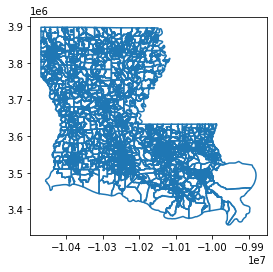

In [43]:
shapefiles_census.boundary.plot()

In [44]:
print(shapefiles_census.shape)
vest_shp.shape

(3758, 16)


(3753, 26)

<AxesSubplot:>

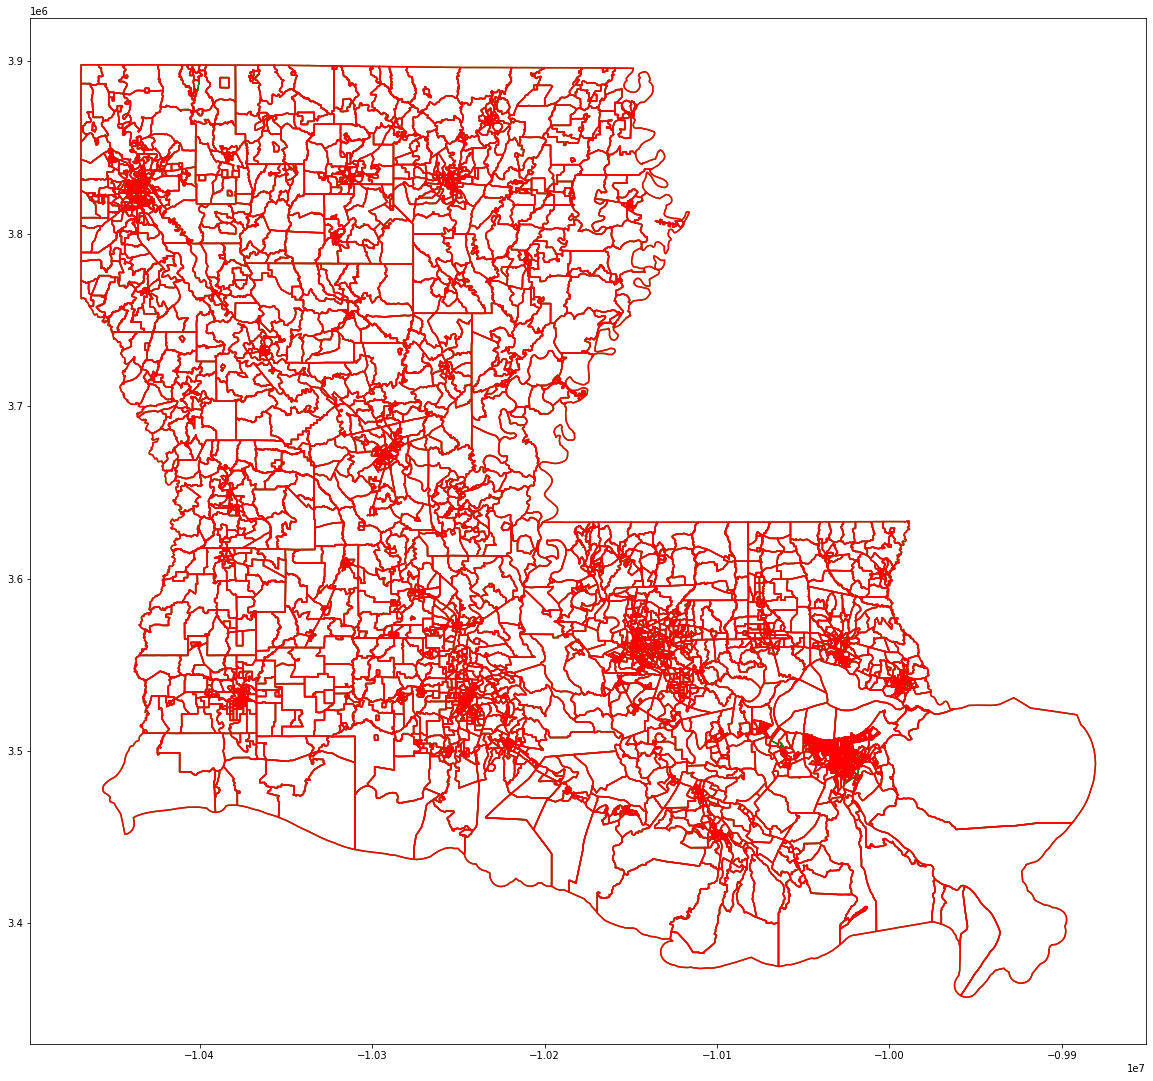

In [45]:
ax = shapefiles_census.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [46]:
shapefiles_census["join_col"]=shapefiles_census['COUNTYFP']+shapefiles_census['VTDST']

## Merge Precincts  
VEST- The following precincts were modified to reflect alterations enacted prior to the 2020 election:    
Avoyelles: Merge 2-5B/6-1A  
East Baton Rouge: Split 3-16/3-71, 3-32/3-72  
Plaquemines: Merge 2-1/2-2, 4-1/4-2, 5-1/5-2  
St. Charles: Merge 2-6/2-7, 3-1/3-6, 3-3/3-4, 6-2/6-3, 6-4/6-5  
Vermilion: Split 49B-1/49B-2  
Webster: Merge 7/11  
West Baton Rouge: Split 2-A/2-B; 11-A/11-B  

<AxesSubplot:>

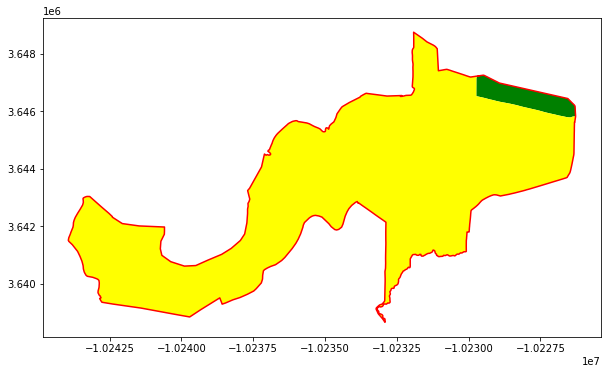

In [47]:
ax = vest_shp[vest_shp['join_col'] == '009006-1A'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '009002-5B'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '009006-1A'].plot(figsize=(10,10),ax=ax,color="yellow")

In [48]:
#Merge 2-5B/6-1A precincts according to VEST document
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="009002-5B"],shapefiles_census.loc[shapefiles_census["join_col"]=="009006-1A"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="009006-1A","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="009002-5B"]

<AxesSubplot:>

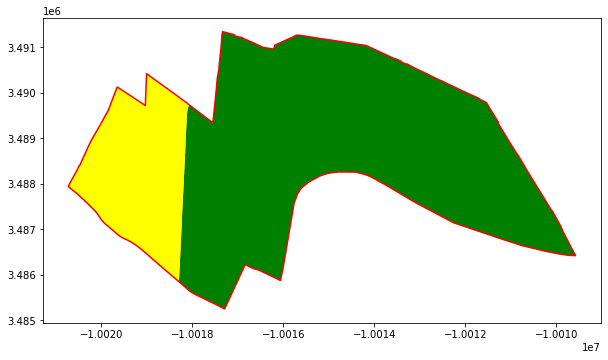

In [49]:
ax = vest_shp[vest_shp['join_col'] == '0750002-1'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '0750002-1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '0750002-2'].plot(figsize=(10,10),ax=ax,color="yellow")

In [50]:
#Merge 2-1/2-2 precincts according to VEST document
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="0750002-1"],shapefiles_census.loc[shapefiles_census["join_col"]=="0750002-2"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="0750002-1","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="0750002-2"]

<AxesSubplot:>

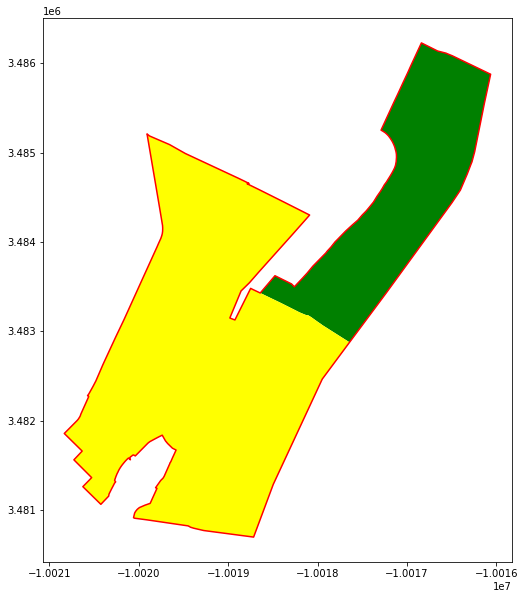

In [51]:
ax = vest_shp[vest_shp['join_col'] == '0750004-1'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '0750004-1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '0750004-2'].plot(figsize=(10,10),ax=ax,color="yellow")

In [52]:
#Merge 4-1/4-2 precincts according to VEST document
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="0750004-1"],shapefiles_census.loc[shapefiles_census["join_col"]=="0750004-2"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="0750004-1","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="0750004-2"]

<AxesSubplot:>

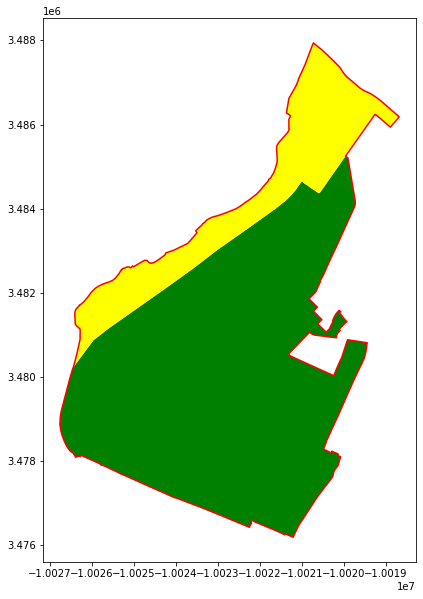

In [53]:
ax = vest_shp[vest_shp['join_col'] == '0750005-1'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '0750005-1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '0750005-2'].plot(figsize=(10,10),ax=ax,color="yellow")

In [54]:
#Merge 5-1/5-2 precincts according to VEST document
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="0750005-1"],shapefiles_census.loc[shapefiles_census["join_col"]=="0750005-2"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="0750005-1","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="0750005-2"]

<AxesSubplot:>

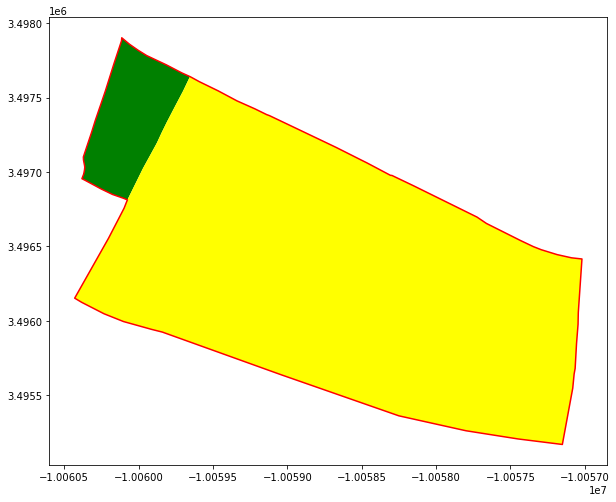

In [55]:
ax = vest_shp[vest_shp['join_col'] == '0890002-6'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '0890002-6'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '0890002-7'].plot(figsize=(10,10),ax=ax,color="yellow")

In [56]:
#Merge 2-6/2-7 precincts according to VEST document
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="0890002-6"],shapefiles_census.loc[shapefiles_census["join_col"]=="0890002-7"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="0890002-6","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="0890002-7"]

<AxesSubplot:>

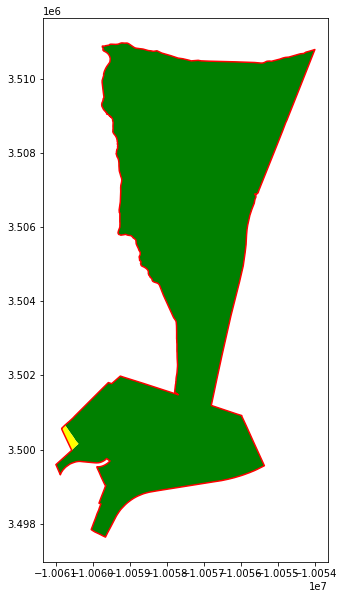

In [57]:
ax = vest_shp[vest_shp['join_col'] == '0890003-1'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '0890003-1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '0890003-6'].plot(figsize=(10,10),ax=ax,color="yellow")

In [58]:
#Merge 3-1/3-6 precincts according to VEST document
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="0890003-1"],shapefiles_census.loc[shapefiles_census["join_col"]=="0890003-6"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="0890003-1","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="0890003-6"]

<AxesSubplot:>

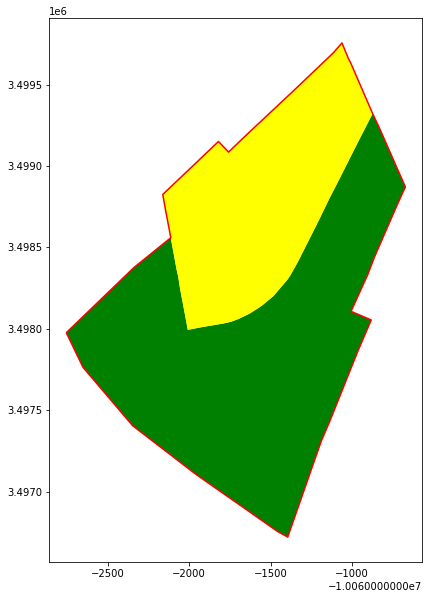

In [59]:
ax = vest_shp[vest_shp['join_col'] == '0890003-3'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '0890003-3'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '0890003-4'].plot(figsize=(10,10),ax=ax,color="yellow")

In [60]:
#Merge 3-3/3-4 precincts according to VEST document
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="0890003-3"],shapefiles_census.loc[shapefiles_census["join_col"]=="0890003-4"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="0890003-3","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="0890003-4"]

<AxesSubplot:>

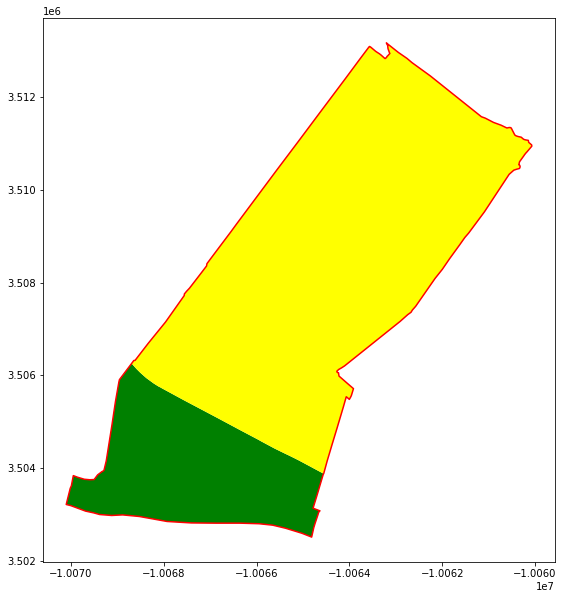

In [61]:
ax = vest_shp[vest_shp['join_col'] == '0890006-2'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '0890006-2'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '0890006-3'].plot(figsize=(10,10),ax=ax,color="yellow")

In [62]:
#Merge 6-2/6-3 precincts according to VEST document
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="0890006-2"],shapefiles_census.loc[shapefiles_census["join_col"]=="0890006-3"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="0890006-2","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="0890006-3"]

<AxesSubplot:>

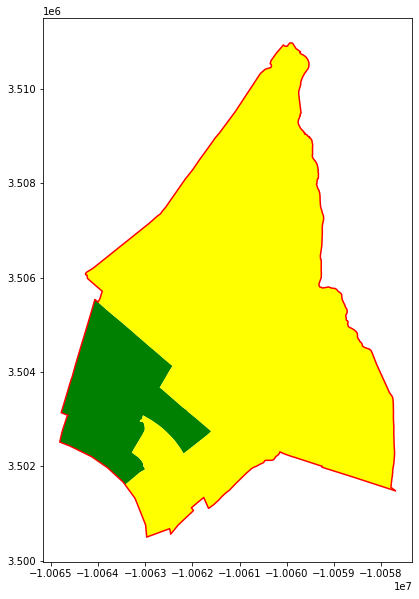

In [63]:
ax = vest_shp[vest_shp['join_col'] == '0890006-4'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '0890006-4'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '0890006-5'].plot(figsize=(10,10),ax=ax,color="yellow")

In [64]:
#Merge 6-4/6-5 precincts according to VEST document
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="0890006-4"],shapefiles_census.loc[shapefiles_census["join_col"]=="0890006-5"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
print(new_fort)
shapefiles_census.loc[shapefiles_census["join_col"]=="0890006-4","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="0890006-5"]

  STATEFP COUNTYFP   VTDST NAMELSAD VTDI LSAD CHNG_TYPE ORIG_NAME ORIG_CODE  \
0      22      089  0006-4      6-4    A   00      None      None      None   
1      22      089  0006-5      6-5    A   00      None      None      None   

  RELATE NAME VINTAGE FUNCSTAT JUSTIFY  MTFCC  \
0   None  6-4      90        N    None  G5240   
1   None  6-5      90        N    None  G5240   

                                            geometry   join_col  
0  POLYGON ((-10064768.294 3502719.802, -10064741...  0890006-4  
1  POLYGON ((-10064271.480 3506089.212, -10064234...  0890006-5  


<AxesSubplot:>

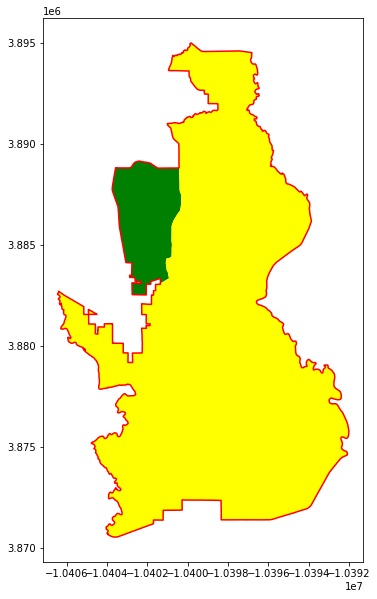

In [65]:
ax = vest_shp[vest_shp['join_col'] == '119000011'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '119000007'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '119000011'].plot(figsize=(10,10),ax=ax,color="yellow")

In [66]:
#Merge 7/11 precincts according to VEST document
#shapefiles_census[shapefiles_census["join_col"]=="119000007"] = shapefiles_census[shapefiles_census["join_col"]=="119000007"].explode(index_parts=True)

exploded = shapefiles_census[shapefiles_census["join_col"]=="119000011"]
exploded = exploded.explode()
exploded =exploded.reset_index()
exploded=exploded.drop(columns=['level_0', 'level_1'])
shapefiles_census[shapefiles_census["join_col"]=="119000011"]=exploded.loc[[1]]

prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="119000007"],shapefiles_census.loc[shapefiles_census["join_col"]=="119000011"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="119000011","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="119000007"]

## Split Precincts
Merge precincts in VEST to mimic splits.

<AxesSubplot:>

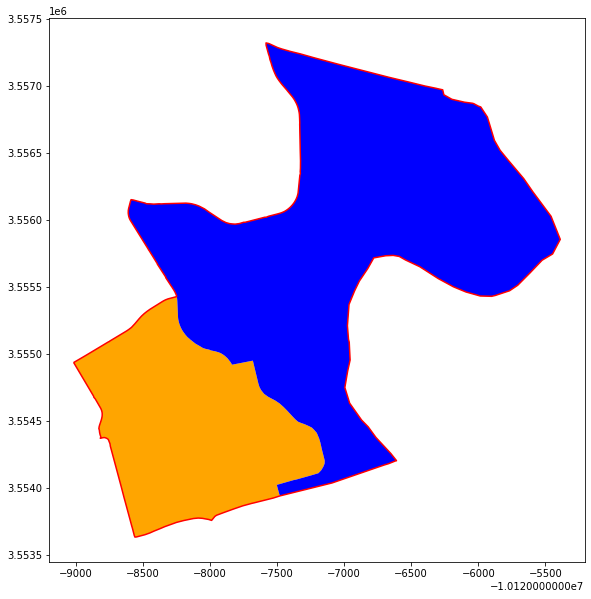

In [67]:
ax = shapefiles_census[shapefiles_census['join_col'] =='033003-16'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '033003-16'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '033003-71'].plot(ax=ax, color='blue')

In [68]:
#Merge precinct 3-16/3-71
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="033003-16"],vest_shp.loc[vest_shp["join_col"]=="033003-71"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="033003-16","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="033003-16"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="033003-71"]

<AxesSubplot:>

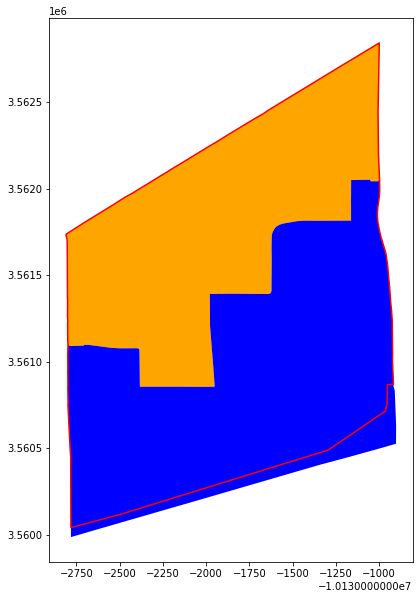

In [69]:
ax = shapefiles_census[shapefiles_census['join_col'] =='033003-32'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '033003-32'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '033003-72'].plot(ax=ax, color='blue')

In [70]:
#Merge precinct 3-32/3-72
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="033003-32"],vest_shp.loc[vest_shp["join_col"]=="033003-72"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="033003-32","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="033003-32"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="033003-72"]

<AxesSubplot:>

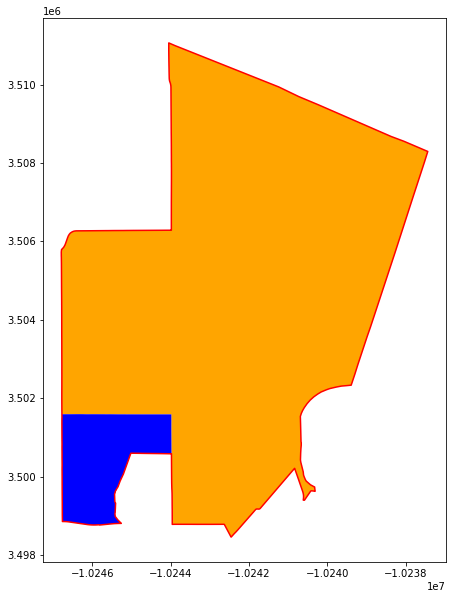

In [71]:
ax = shapefiles_census[shapefiles_census['join_col'] =='113049B-1'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '113049B-1'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '113049B-2'].plot(ax=ax, color='blue')

In [72]:
#Merge precinct 49B-1/49B-2
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="113049B-1"],vest_shp.loc[vest_shp["join_col"]=="113049B-1"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="113049B-1","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="113049B-2"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="113049B-2"]

<AxesSubplot:>

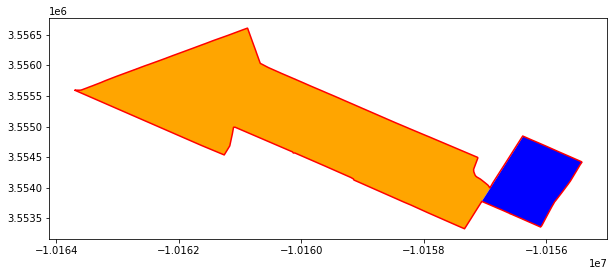

In [73]:
ax = shapefiles_census[shapefiles_census['join_col'] =='12100002B'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '12100002A'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '12100002B'].plot(ax=ax, color='blue')

In [74]:
#Merge precinct 2-A/2-B
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="12100002A"],vest_shp.loc[vest_shp["join_col"]=="12100002B"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="12100002B","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="12100002A"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="12100002A"]

<AxesSubplot:>

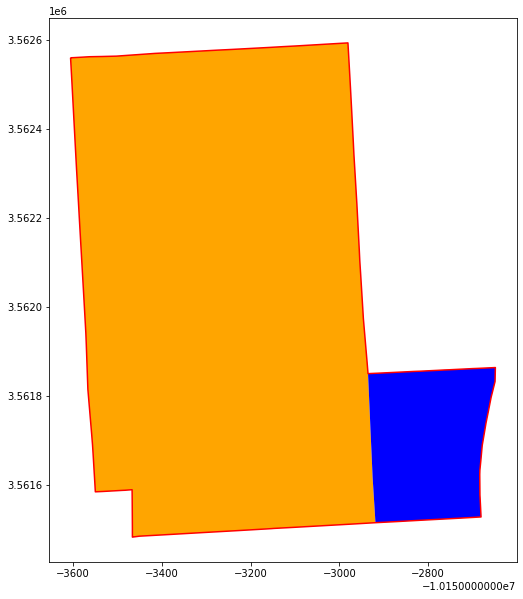

In [75]:
ax = shapefiles_census[shapefiles_census['join_col'] =='12100011A'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '12100011A'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '12100011B'].plot(ax=ax, color='blue')

In [76]:
#Merge precinct 11-A/11-B
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="12100011A"],vest_shp.loc[vest_shp["join_col"]=="12100011B"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="12100011A","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="12100011B"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="12100011B"]

## Attempt Join

In [77]:
join_attempt_one = pd.merge(shapefiles_census,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          3740
left_only        8
right_only       7
Name: _merge, dtype: int64


In [78]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP_x','VTDST','COUNTYFP_y','join_col']]

,COUNTYFP_x,VTDST,COUNTYFP_y,join_col
1536,051,ZZZZZZ,NaN,051ZZZZZZ
2392,071,ZZZZZZ,NaN,071ZZZZZZ
2731,087,000058,NaN,087000058
2771,089,ZZZZZZ,NaN,089ZZZZZZ
2849,095,ZZZZZZ,NaN,095ZZZZZZ
3213,103,ZZZZZZ,NaN,103ZZZZZZ
3303,105,ZZZZZZ,NaN,105ZZZZZZ
3607,NaN,NaN,NaN,None
3748,NaN,NaN,033,033003-71
3749,NaN,NaN,033,033003-72


In [79]:
shapefiles_census_comp = join_attempt_one[join_attempt_one['_merge'] == 'both']

In [80]:
final_merge = pd.merge(shapefiles_census_comp,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

both          3738
right_only      10
left_only        2
Name: final_merge, dtype: int64

In [81]:
final_merge[final_merge["final_merge"] != 'both'][['COUNTYFP_x','VTDST_x','COUNTYFP_y','VTDST_y','join_col']]

,COUNTYFP_x,VTDST_x,COUNTYFP_y,VTDST_y,join_col
919,033,003-16,033,NaN,033003-16
932,033,003-32,033,NaN,033003-32
3740,NaN,NaN,NaN,ZZZZZZ,051ZZZZZZ
3741,NaN,NaN,NaN,ZZZZZZ,071ZZZZZZ
3742,NaN,NaN,NaN,000051,087000051
3743,NaN,NaN,NaN,ZZZZZZ,089ZZZZZZ
3744,NaN,NaN,NaN,ZZZZZZ,095ZZZZZZ
3745,NaN,NaN,NaN,ZZZZZZ,103ZZZZZZ
3746,NaN,NaN,NaN,ZZZZZZ,105ZZZZZZ
3747,NaN,NaN,NaN,000011,119000011


In [82]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     3724
False      14
dtype: int64


1) For 113-49B-1 difference in area is 0.5434635497586222


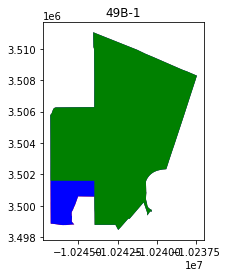

In [83]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [84]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(3738, 1)
3734 precincts w/ a difference of 0 km^2
3 precincts w/ a difference between 0 and 0.1 km^2
0 precincts w/ a difference between 0.1 and 0.5 km^2
1 precincts w/ a difference between 0.5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2
